<a href="https://colab.research.google.com/github/FarazAhmad2/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [60]:
# Importing required libraries
import numpy as np
# To handle the dataset
import pandas as pd

# For plots and visualizations
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer

# For getting optimal number of clusters in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram,linkage
# To scale the data
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# metrics to evaluate the clusters
from sklearn.metrics import silhouette_score, silhouette_samples
# Clustering alorithms
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
# Display utilities
from IPython.display import Markdown, display

# activating DND to disregard the warnings by goiing silent mode
import warnings
warnings.filterwarnings('ignore')

# setting default parameters for the plots
# plt.rcParams["figure.figsize"] = (20,5)
# plt.rcParams["figure.dpi"] = 150

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filepath = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Customer Segmentation - Faraz Ahmad/Online Retail.xlsx'
df = pd.read_excel(filepath)

In [4]:
# Checking shape pf dataframe
df.shape

(541909, 8)

In [5]:
# Checking top 5 entries
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
# Checking bottom 5 entries
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

In [7]:
# Checking null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

# <b> Data cleaning </b>

In [9]:
# Missing data counts and percentage
missing = df.columns[df.isnull().any()].tolist()

print('Missing Data Count')
print(df[missing].isnull().sum().sort_values(ascending = False))
print('---'*8)
print('Missing Data Percentage')
print(round(df[missing].isnull().sum().sort_values(ascending = False)/len(df)*100,2))

Missing Data Count
CustomerID     135080
Description      1454
dtype: int64
------------------------
Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


* 24.93% of items purchases are not assigned to any customer.
* Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

In [10]:
# Dropping the rows with null values
df.dropna(inplace=True)

In [11]:
# Checking duplicate values
len(df[df.duplicated()])

5225

In [12]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
# Checking null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


# <b> Feature engineering </b>

In [14]:
# Creating new features from the datetime column InvoiceDate
df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month_name())
df['Day'] = df['InvoiceDate'].apply(lambda x: x.day_name())
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)

In [15]:
# Creating a new feature 'TotalAmount' by multiplying Quantity and UnitPrice
df['TotalAmount'] = df['Quantity']*df['UnitPrice']

In [16]:
# Creating a new feature 'TimeType' based on hours to define whether its Morning,Afternoon or Evening
df['TimeType'] = np.where((df["hour"]>5)&(df["hour"]<18), np.where(
                           df["hour"]<12, 'Morning','Afternoon'),'Evening')

### <b> We have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation </b>

In [17]:
# We have to drop some  InvoiceNo  which are starts with 'c' because 'c', it indicates a cancellation
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
cancellations = df[df['InvoiceNo'].str.contains('C')]
cancellations.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  year  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  2010   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  2010   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  2010   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  2010   

        Month        Day  hour  TotalAmount TimeType  
141  December  Wednesday     9       -27.50  Morning  
154  December  Wednesday     9        -4.65  Morning  
235  December  Wednesday    10       -19.80  Morning  
236  December  Wednesday    10        -6.96  Morning  
237  December  Wednesday    10        -6.96  Morning

In [18]:
df = df[~df['InvoiceNo'].str.contains('C')]

# <b> Exploratory data analysis </b>

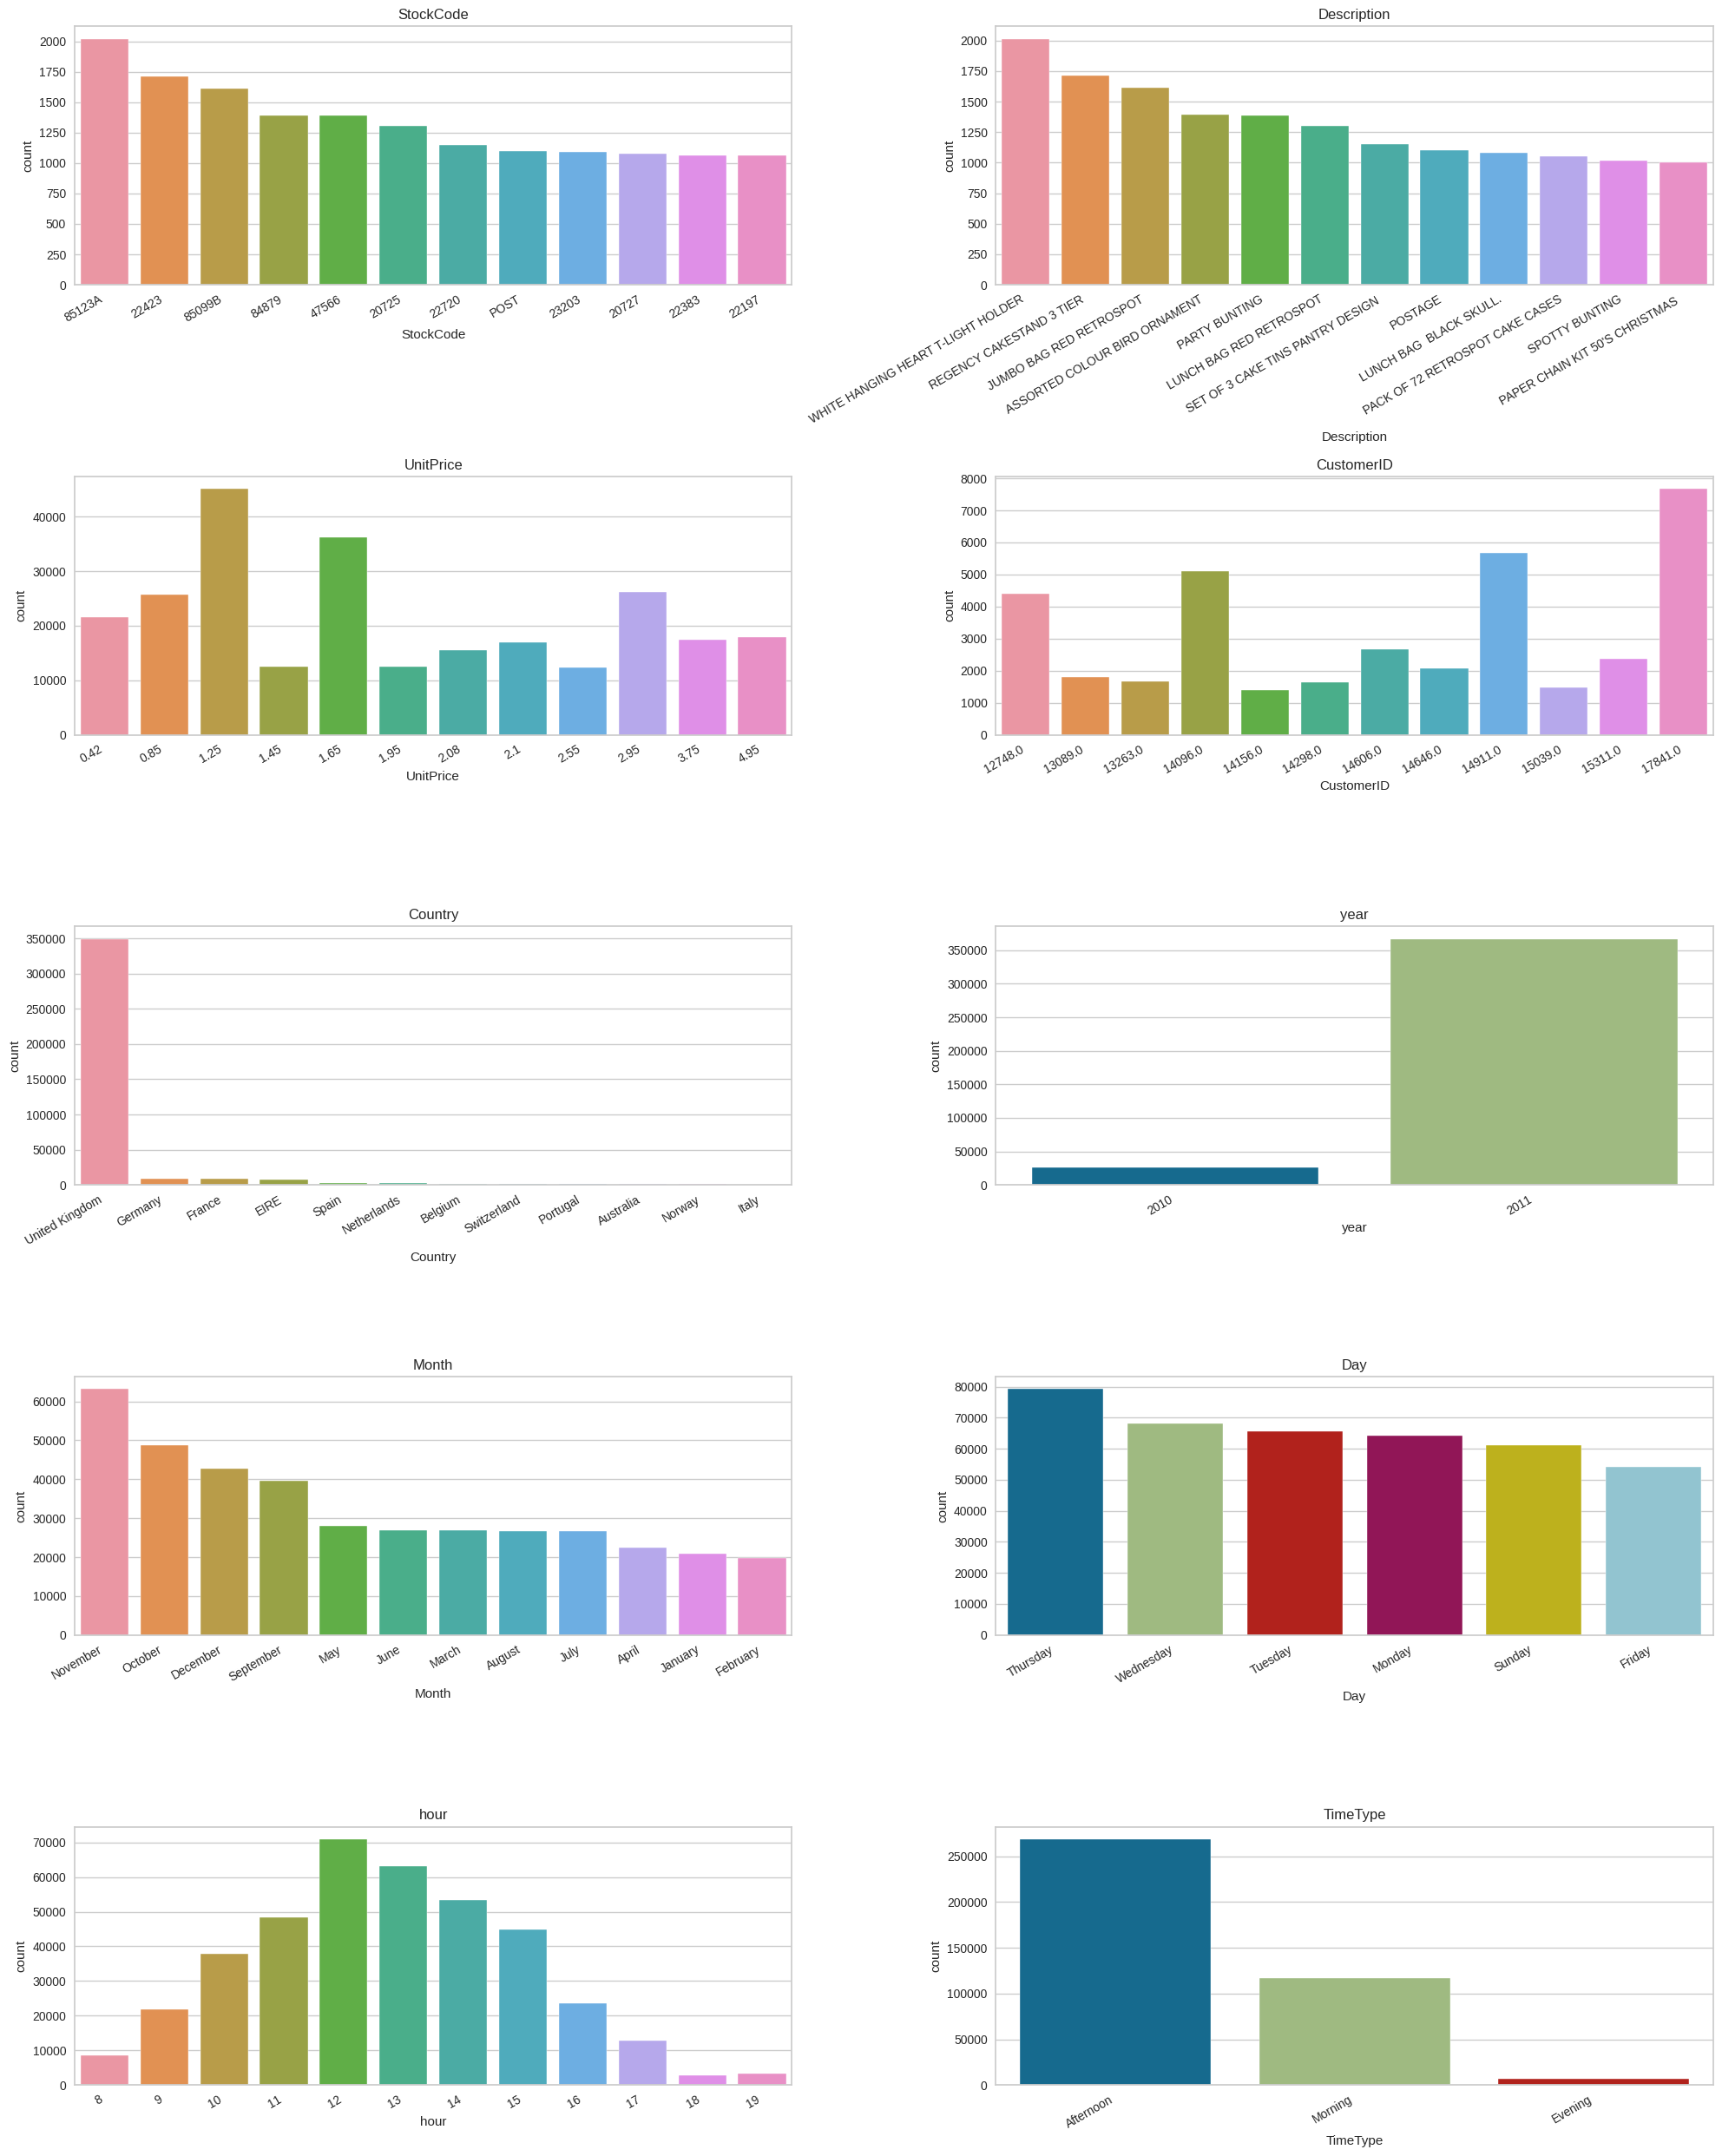

In [19]:
# Plotting top values based on frequency in each column
target = ['StockCode', 'Description','UnitPrice', 'CustomerID', 'Country',
          'year', 'Month','Day','hour','TimeType']

plt.figure(figsize=(20,25), dpi=100)
for n,col in enumerate(target):
  plt.subplot(5, 2, n+1)
  temp = df[col].value_counts().reset_index().head(12)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col)
  plt.xticks(rotation=30, ha='right')
  plt.tight_layout()

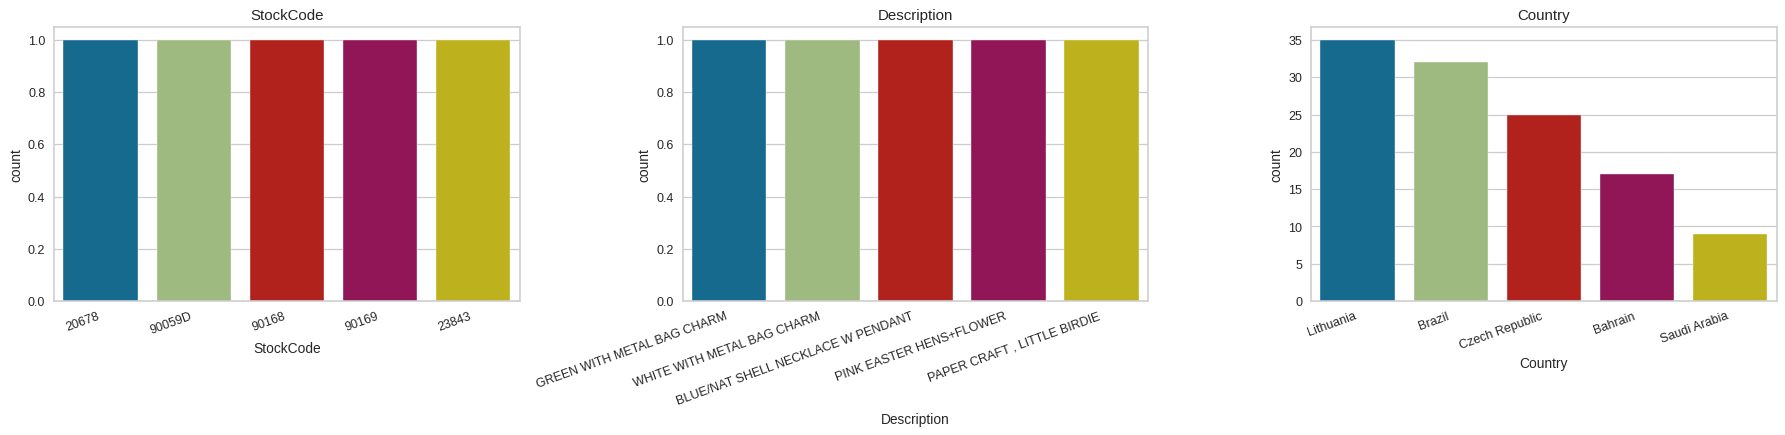

In [20]:
# Plotting Bottom 5 values based on frequency in each column
target = ['StockCode', 'Description','Country']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  temp = df[col].value_counts().reset_index().tail(5)
  temp.rename(columns={'index': col, col:'count'}, inplace=True)
  sns.barplot(x=col ,y='count', data=temp).set(title=col)
  plt.xticks(rotation=20,ha='right')
  plt.tight_layout()

* Most Customers are from United Kingdom. Considerable number of customers are also from Germany, France, EIRE and Spain. Whereas Saudi Arabia, Bahrain, Czech Republic, Brazil and Lithuania has least number of customers.
* There are no orders placed on Saturdays. Looks like it's a non working day for the retailer.
* Most of the customers have purchased the gifts in the month of November, October, December and September. Less number of customers have purchased the gifts in the month of April, January and February.
*Most of the customers have purchased the items in Afternoon, moderate numbers of customers have purchased the items in Morning and the least in Evening.
* WHITE HANGING HEART T-LIGHT HOLDER, REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the most ordered products.

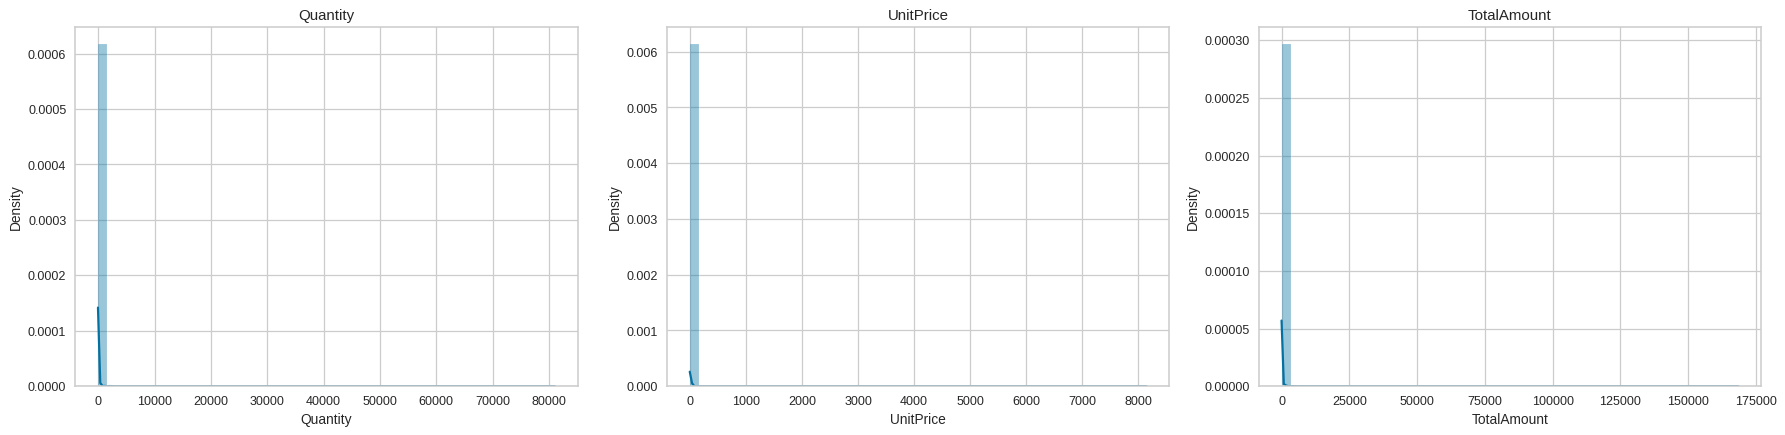

In [21]:
# Visualizing the distributions.
target = ['Quantity','UnitPrice','TotalAmount']
plt.figure(figsize=(20,5), dpi=90)
for n,col in enumerate(target):
  plt.subplot(1, 3, n+1)
  sns.distplot(df[col])
  plt.title(col)
  plt.tight_layout()

* It shows a positively skewed distribution because most of the values are clustered around the left side of the distribution while the right tail of the distribution is longer, which means mean>median>mode.
* For symmetric graph mean=median=mode.

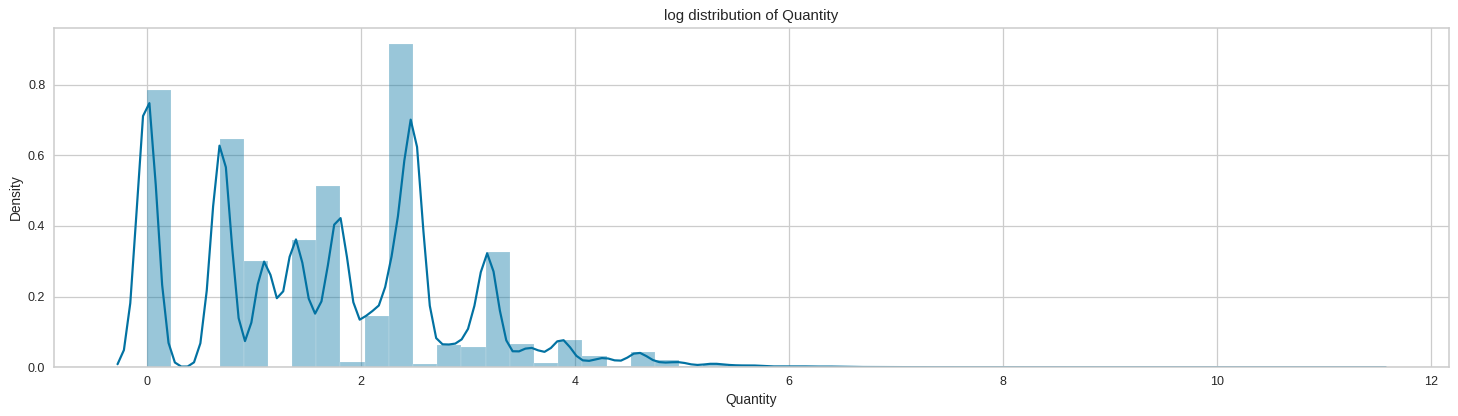

In [22]:
# Visualizing the distributions after log transformation of Quantity
plt.figure(figsize=(20,5), dpi=90)
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']))
plt.show()

In [23]:
# Most orders placed are from these countries
country_invoice = df.groupby('Country')['InvoiceNo'].nunique().reset_index().sort_values('InvoiceNo',ascending=False)
country_invoice.rename(columns={'InvoiceNo': 'Invoice_Count'}, inplace=True)
country_invoice.head()

Country  Invoice_Count
35  United Kingdom          16649
14         Germany            457
13          France            389
10            EIRE            260
3          Belgium             98

United Kingdom is making most of the purchases as compared to other countries.

In [24]:
# Function for plotting bar plots
def plot_bar(dataset,x,y,ttl1,ttl2):
  plt.figure(figsize=(20,5), dpi=90)
  plt.subplot(1,2,1)
  plt.xticks(rotation=20,ha='right')
  plt.title(ttl1)
  sns.barplot(data=dataset.head(10),x=x, y=y)

  plt.subplot(1,2,2)
  plt.xticks(rotation=20, ha='right')
  plt.title(ttl2)
  sns.barplot(data=dataset.tail(10), x=x, y=y)
  plt.show()

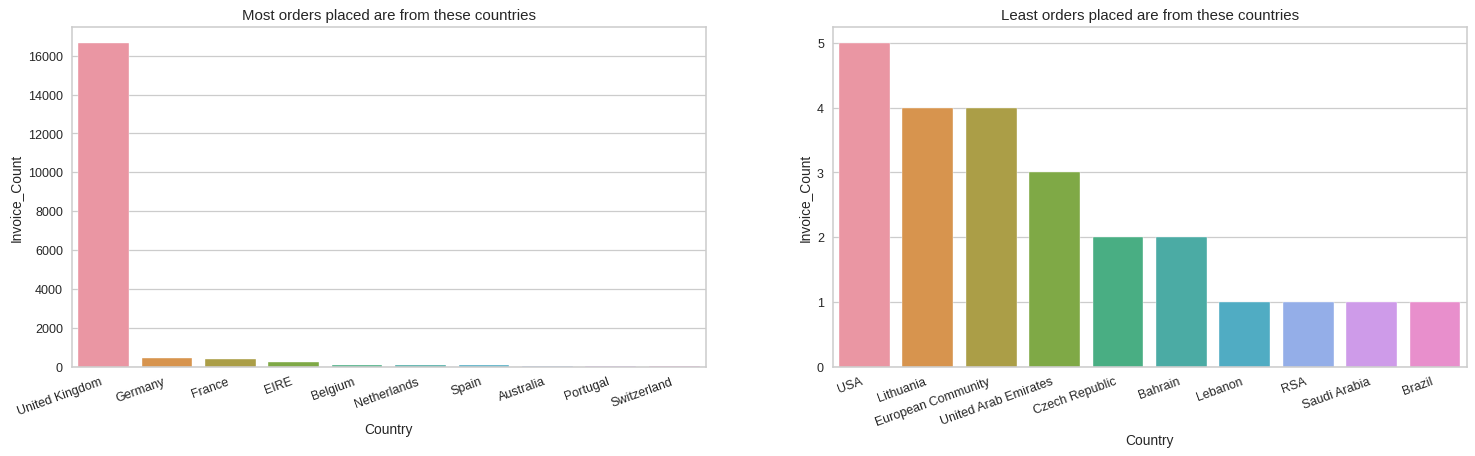

In [25]:
# Visualizing top and bottom 10 countries based on total invoices 
ttl1 = 'Most orders placed are from these countries'
ttl2 = 'Least orders placed are from these countries'
plot_bar(country_invoice,'Country','Invoice_Count',ttl1,ttl2)

In [26]:
# Most customers are from these countries
country_cust = df.groupby('Country')['CustomerID'].nunique().reset_index().sort_values('CustomerID', ascending=False)
country_cust.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
country_cust.head()

Country  Customer_Count
35  United Kingdom            3921
14         Germany              94
13          France              87
30           Spain              30
3          Belgium              25

United Kingdom has most number of customers.

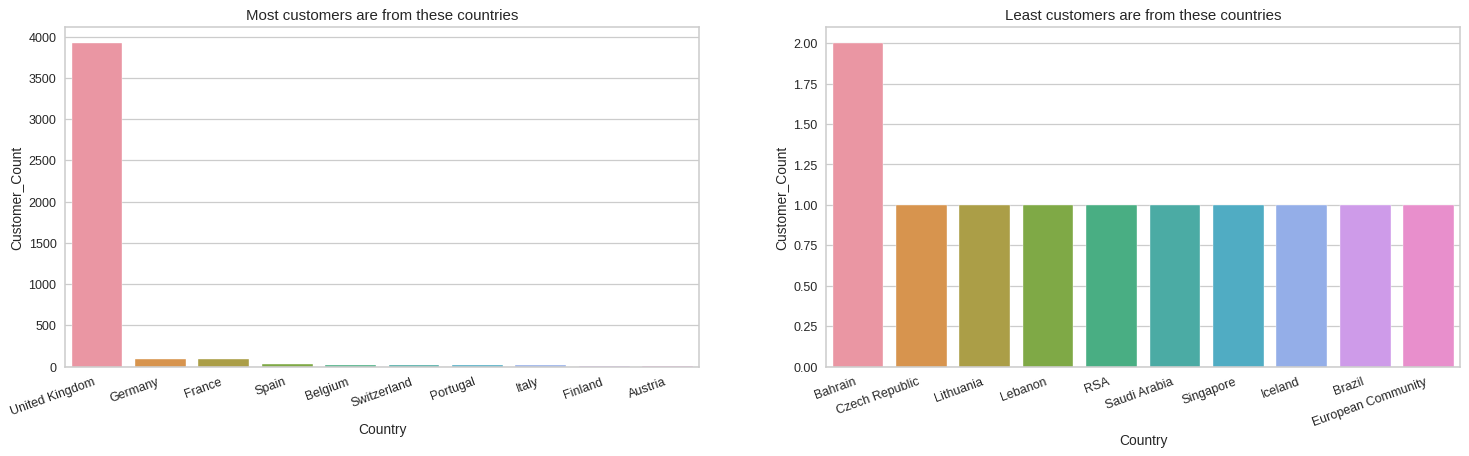

In [27]:
# Visualizing top and bottom 10 countries based on total customers 
ttl1 = 'Most customers are from these countries'
ttl2 = 'Least customers are from these countries'
plot_bar(country_cust,'Country','Customer_Count',ttl1,ttl2)

In [28]:
# Countrywise average item purchases
country_quantity = df.groupby('Country')['Quantity'].mean().round(2).reset_index().sort_values('Quantity',ascending=False)
country_quantity.rename(columns={'Quantity': 'Average_Quantity'}, inplace=True)
country_quantity.head()

Country  Average_Quantity
23     Netherlands             85.03
19           Japan             81.05
31          Sweden             80.17
0        Australia             71.11
8   Czech Republic             26.84

Orders with mass quantity are placed by the customers from Netherlands.

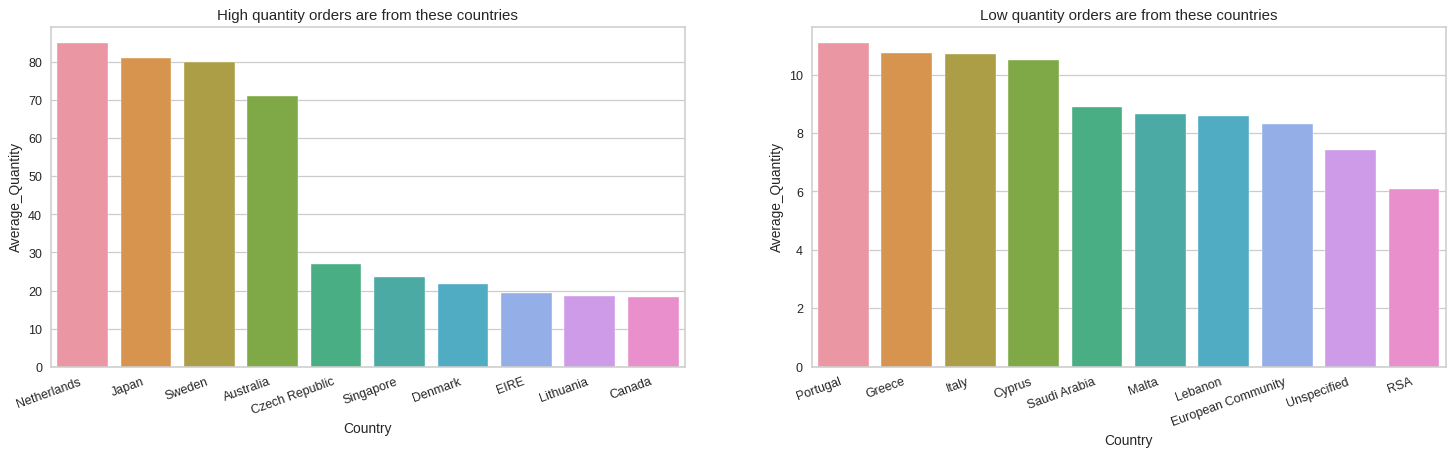

In [29]:
# Visualizing top and bottom 10 countries based on average item purchases 
ttl1 = 'High quantity orders are from these countries'
ttl2 = 'Low quantity orders are from these countries'
plot_bar(country_quantity,'Country','Average_Quantity',ttl1,ttl2)

In [30]:
# Quantity wise item purchases
product_quantity = df.groupby("Description")["Quantity"].sum().reset_index().sort_values("Quantity",ascending=False)
product_quantity.head()

Description  Quantity
2319         PAPER CRAFT , LITTLE BIRDIE     80995
1992      MEDIUM CERAMIC TOP STORAGE JAR     77916
3786   WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
1762             JUMBO BAG RED RETROSPOT     46078
3698  WHITE HANGING HEART T-LIGHT HOLDER     36706

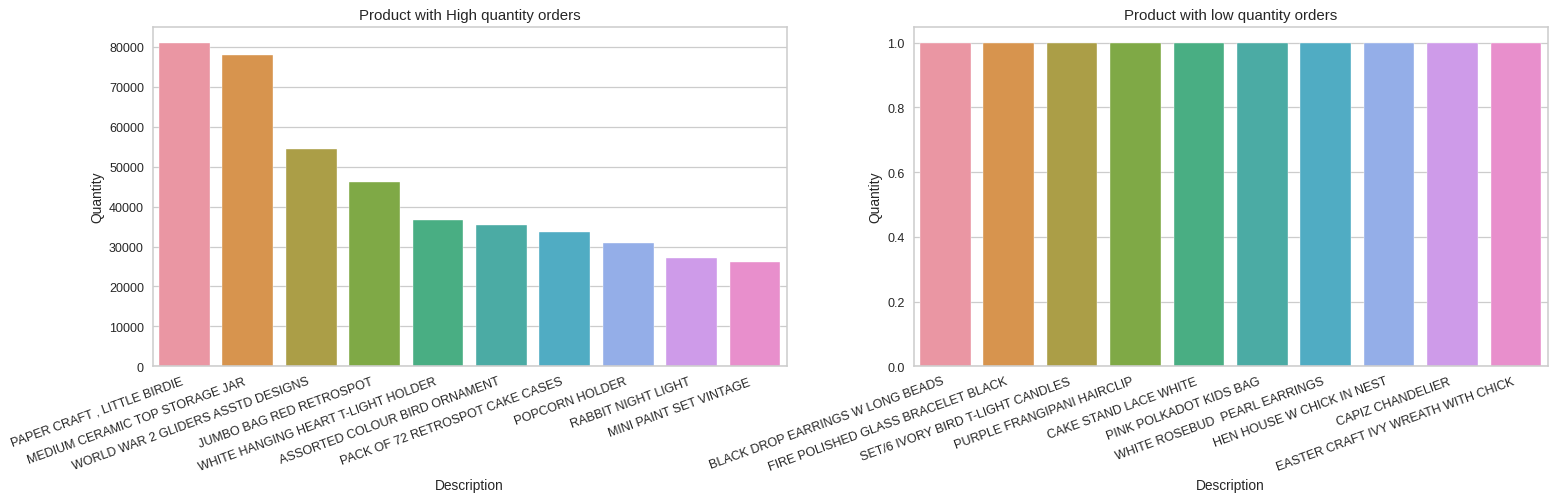

In [31]:
# Visualizing top and bottom 10 products based on purchase quantity
ttl1 = 'Product with High quantity orders'
ttl2 = 'Product with low quantity orders'
plot_bar(product_quantity,'Description','Quantity', ttl1, ttl2)

In [32]:
# Amount wise item purchases
product_price = df.groupby('Description')['TotalAmount'].sum().reset_index().sort_values('TotalAmount',ascending=False)
product_price.head()

Description  TotalAmount
2319         PAPER CRAFT , LITTLE BIRDIE    168469.60
2767            REGENCY CAKESTAND 3 TIER    142264.75
3698  WHITE HANGING HEART T-LIGHT HOLDER    100392.10
1762             JUMBO BAG RED RETROSPOT     85040.54
1992      MEDIUM CERAMIC TOP STORAGE JAR     81416.73

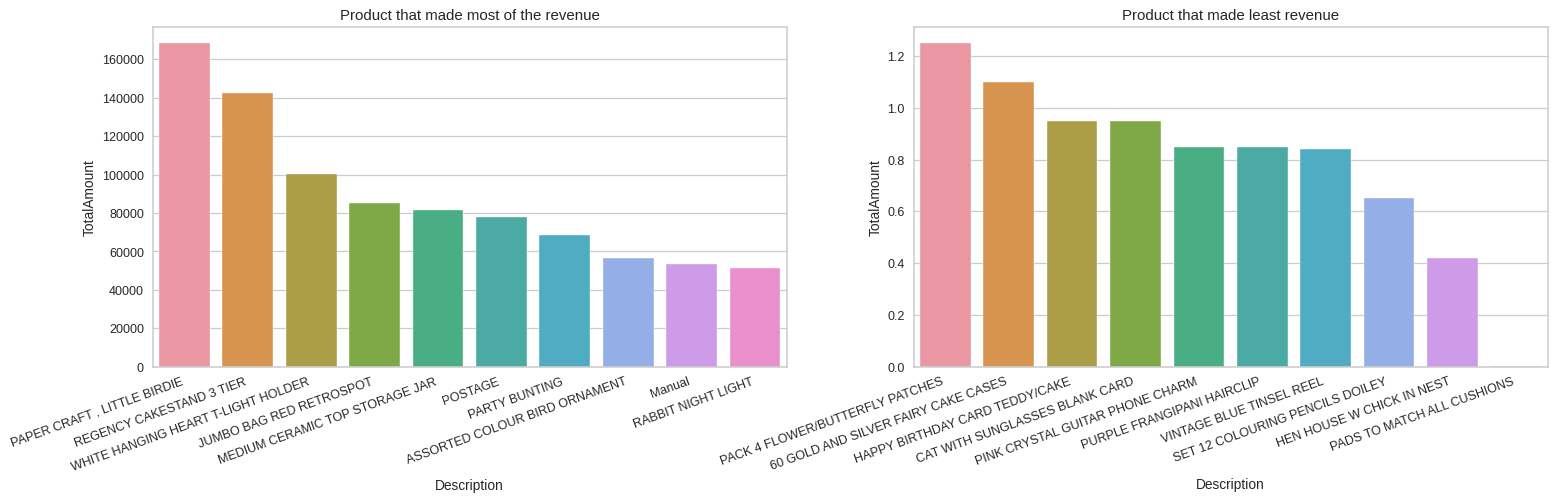

In [33]:
# Visualizing top and bottom 10 products based on amount
ttl1 = 'Product that made most of the revenue'
ttl2 = 'Product that made least revenue'
plot_bar(product_price,'Description','TotalAmount',ttl1,ttl2)

In [34]:
# customer wise item purchases
product_customer = df.groupby('Description')['CustomerID'].nunique().reset_index().sort_values('CustomerID',ascending=False)
product_customer.rename(columns={'CustomerID': 'Customer_Count'}, inplace=True)
product_customer.head()

Description  Customer_Count
2767            REGENCY CAKESTAND 3 TIER             881
3698  WHITE HANGING HEART T-LIGHT HOLDER             856
2345                       PARTY BUNTING             708
216        ASSORTED COLOUR BIRD ORNAMENT             678
3001   SET OF 3 CAKE TINS PANTRY DESIGN              640

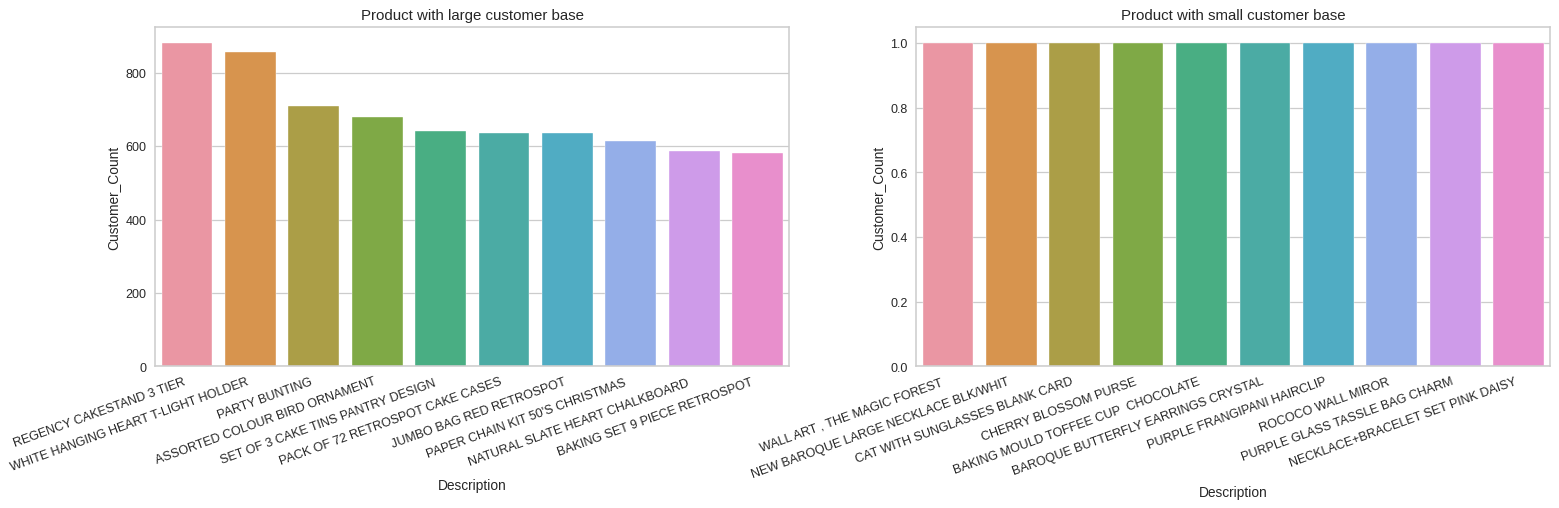

In [35]:
# Visualizing top and bottom 10 products based on customers
ttl1 = 'Product with large customer base'
ttl2 = 'Product with small customer base'
plot_bar(product_customer,'Description','Customer_Count',ttl1,ttl2)

In [36]:
# Checking the number of cancellations by each customer
customer_cancellations = cancellations.groupby('CustomerID')['InvoiceNo'].count().reset_index().sort_values("InvoiceNo",ascending=False)
customer_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
customer_cancellations.head()

CustomerID  Cancellations
736      14911.0            226
1485     17841.0            136
1397     17511.0            113
848      15311.0            112
89       12607.0            101

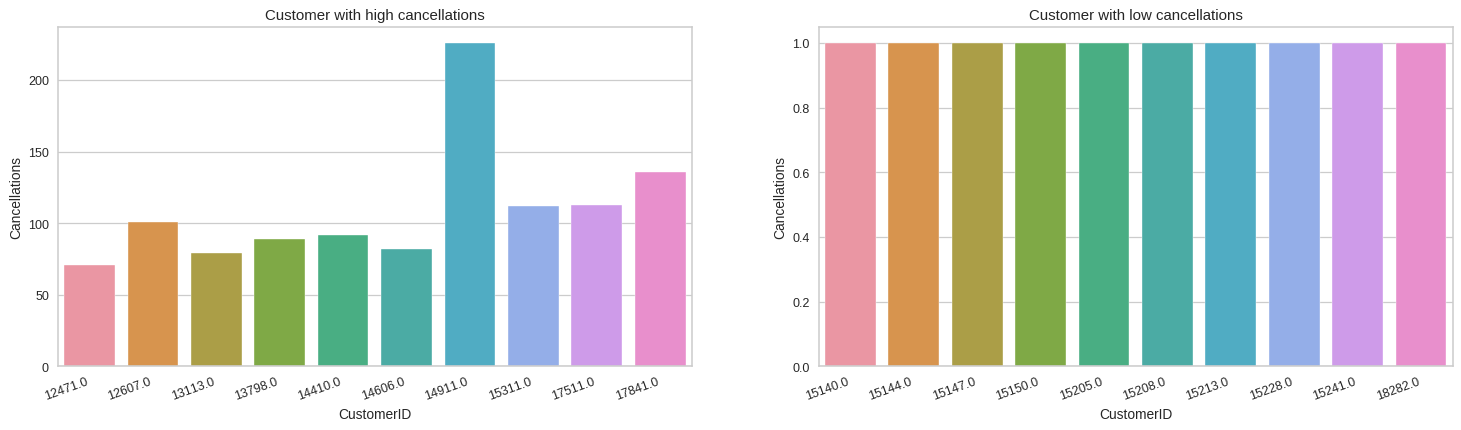

In [37]:
# Visualizing top and bottom 10 customers based on cancellations
ttl1 = 'Customer with high cancellations'
ttl2 = 'Customer with low cancellations'
plot_bar(customer_cancellations,'CustomerID','Cancellations',ttl1,ttl2)

In [38]:
# Checking the number of cancellations countrywise. 
country_cancellations = cancellations.groupby('Country')['InvoiceNo'].count().reset_index().sort_values("InvoiceNo",ascending=False)
country_cancellations.rename(columns={'InvoiceNo': 'Cancellations'}, inplace=True)
country_cancellations.head()

Country  Cancellations
27  United Kingdom           7501
11         Germany            453
7             EIRE            247
10          France            148
26             USA            112

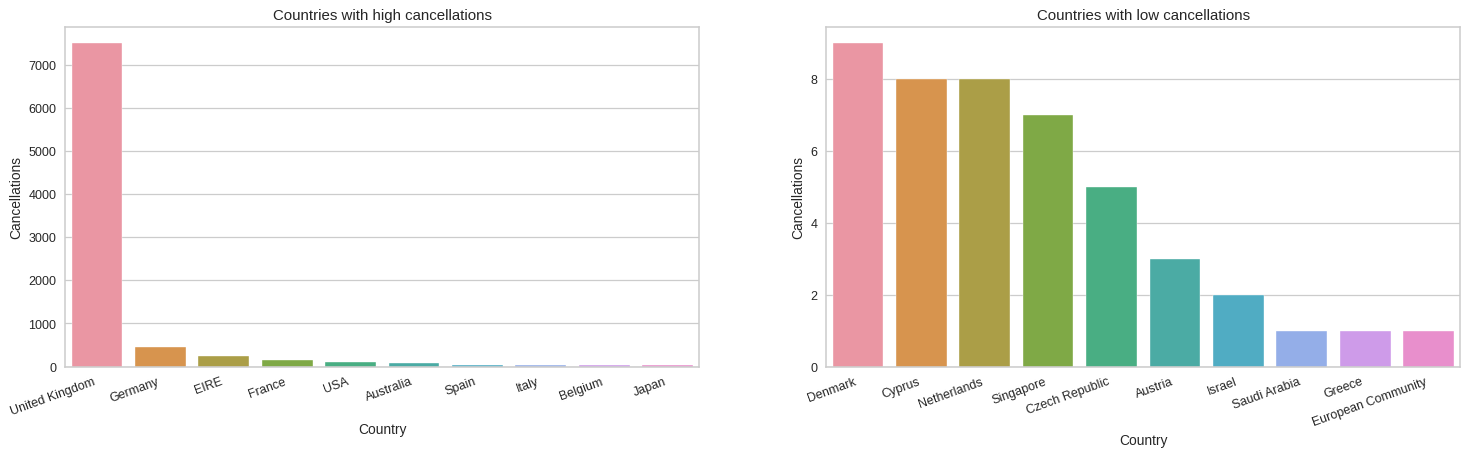

In [39]:
# Visualizing top and bottom 10 countries based on cancellations
ttl1 = 'Countries with high cancellations'
ttl2 = 'Countries with low cancellations'
plot_bar(country_cancellations,'Country','Cancellations',ttl1,ttl2)

# <b> RFM modelling </b>

* Since Most of the Customers are wholesalers, we cannot group customers based on the demographic group like age, gender, income and behavioral and psycho-graphic group Because Our Customers purchase bunch of goods from us and sell it to individual customers.
* We only need to deal issues and make clusters related to B2B Business to Business instead of B2C i.e. Direct from Business to Customers WHY BECAUSE PEOPLE WHO PURCHASE PRODUCTS FROM US DO NOT UTILIZE IT They sell it to individual customers(B2C) or sell all products to another stores (B2B)
* Due to all these reasons we need to cluster customers according to there activities i.e
1. R- Recency
2. F- Frequency
3. M- Monetary

In [40]:
# Adding 1 day to the Last Invoice date to set as Latest date for reference
LatestDate = df["InvoiceDate"].max() + pd.DateOffset(days=1)

# Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
# Amount for each customer

# Creating a new dataframe to calculate Recency, Frequency and Monetary scores for each customer
rfm_df = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (LatestDate - x.max()).days,
                                    'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Renaming the columns
rfm_df.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency',
                    'TotalAmount': 'Monetary'}, inplace=True)

# Checking top 5 rows
rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       19         73   1757.55
4     12350.0      310         17    334.40

<b> Interpretation: </b>

* Recency: How recent a customer made a purchase.
* Frequency: How often a customer makes a purchase.
* Monetary: How much money a customer spends.

In [41]:
# Calculating R, F and M scores by splitting Recency, Frequency	and Monetary based on quantiles
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=4, labels=[4,3,2,1]).astype(int)
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=4, labels=[1,2,3,4]).astype(int)
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=4, labels=[1,2,3,4]).astype(int)

# Finding the RFM Group for each customer by combining the factors R,Fand M
rfm_df['RFM'] = 100*rfm_df['R'] + 10*rfm_df['F'] + rfm_df['M']

# Finding the RFM Score for each customer by adding the factors R,Fand M
rfm_df['RFM_Score'] = rfm_df['R'] + rfm_df['F'] + rfm_df['M']

<b> Interpretation: </b>

* If the RFM of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
* If the RFM of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
* If the RFM of any customer is 144. He purchased a long time ago but buys frequently and spends more. And so on.
* Like this we can come up with number of segments for all combinations of R,F and M base on our usecase. Higher the RFM score, more valuable the customer is.

In [42]:
# Handling the zeroes in the dataframe to avoid error in transformations
rfm_df.replace(0.0,1,inplace=True)

# Applying Log transformation on columns for smoothening the distribution
rfm_df['Recency_Log']   = rfm_df['Recency'].apply(np.log)
rfm_df['Frequency_Log'] = rfm_df['Frequency'].apply(np.log)
rfm_df['Monetary_Log']  = rfm_df['Monetary'].apply(np.log)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M  RFM  RFM_Score  \
CustomerID                                                          
12346.0         326          1  77183.60  1  1  4  114          6   
12347.0           2        182   4310.00  4  4  4  444         12   
12348.0          75         31   1797.24  2  2  4  224          8   
12349.0          19         73   1757.55  3  3  4  334         10   
12350.0         310         17    334.40  1  1  2  112          4   

            Recency_Log  Frequency_Log  Monetary_Log  
CustomerID                                            
12346.0        5.786897       0.000000     11.253942  
12347.0        0.693147       5.204007      8.368693  
12348.0        4.317488       3.433987      7.494007  
12349.0        2.944439       4.290459      7.471676  
12350.0        5.736572       2.833213      5.812338

In [43]:
# Checking Descriptive Stats
rfm_df.describe()

Recency    Frequency       Monetary            R            F  \
count  4339.000000  4339.000000    4339.000000  4339.000000  4339.000000   
mean     92.518322    90.512100    2048.216154     2.514174     2.487670   
std     100.009747   225.515328    8984.248299     1.126392     1.122724   
min       1.000000     1.000000       1.000000     1.000000     1.000000   
25%      18.000000    17.000000     306.455000     2.000000     1.000000   
50%      51.000000    41.000000     668.560000     3.000000     2.000000   
75%     142.000000    98.000000    1660.315000     4.000000     3.000000   
max     374.000000  7676.000000  280206.020000     4.000000     4.000000   

                 M          RFM    RFM_Score  Recency_Log  Frequency_Log  \
count  4339.000000  4339.000000  4339.000000  4339.000000    4339.000000   
mean      2.499885   278.793962     7.501729     3.767274       3.670868   
std       1.118266   118.825268     2.816451     1.432382       1.321685   
min       1.000000   111.000000     3.000000     0.000000       0.000000   
25%       1.500000   211.000000     5.000000     2.890372       2.833213   
50%       2.000000   311.000000     7.000000     3.931826       3.713572   
75%       3.500000   411.000000    10.000000     4.955827       4.584967   
max       4.000000   444.000000    12.000000     5.924256       8.945854   

       Monetary_Log  
count   4339.000000  
mean       6.584187  
std        1.265573  
min        0.000000  
25%        5.725071  
50%        6.505126  
75%        7.414763  
max       12.543280

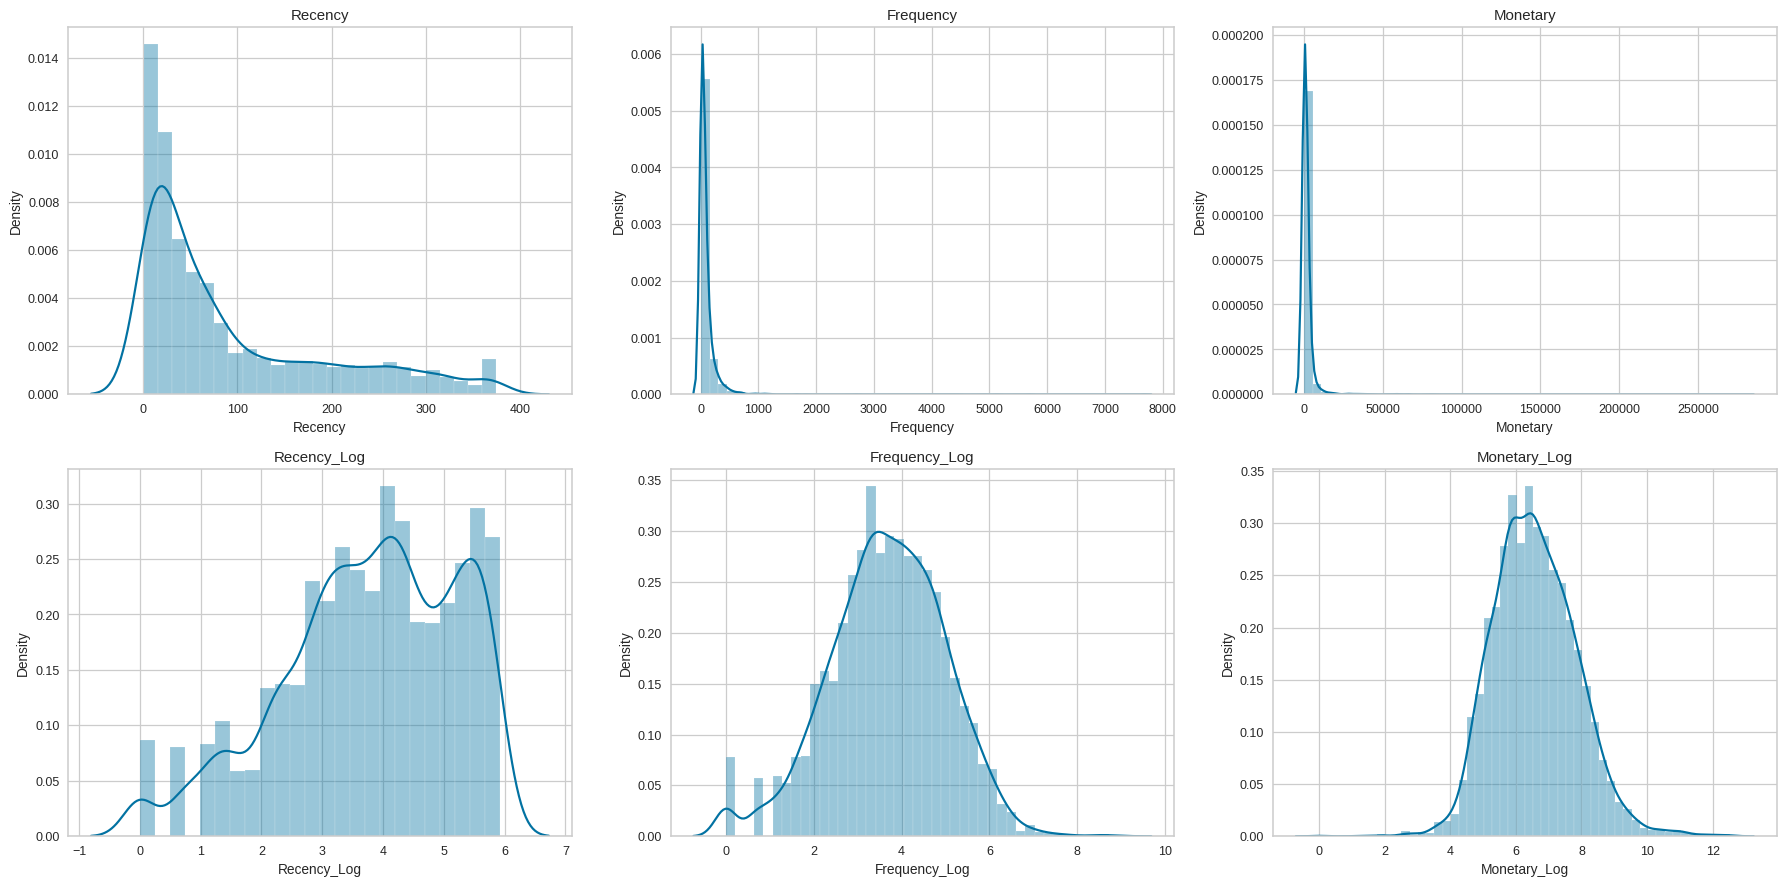

In [44]:
# Visualizing the distributions before and after log transformation.
target = ['Recency', 'Frequency',	'Monetary', 'Recency_Log', 'Frequency_Log', 'Monetary_Log']
plt.figure(figsize=(20,10), dpi=90)
for n,col in enumerate(target):
  plt.subplot(2, 3, n+1)
  sns.distplot(rfm_df[col])
  plt.title(col)
  plt.tight_layout()

<b> Observations: </b>

* Earlier the distributions of Recency, Frequency and Monetary columns were positively skewed but after applying log transformation, the distributions appear to be symmetrical and normally distributed.
* It will be more suitable to use the transformed features for better visualisation of clusters.

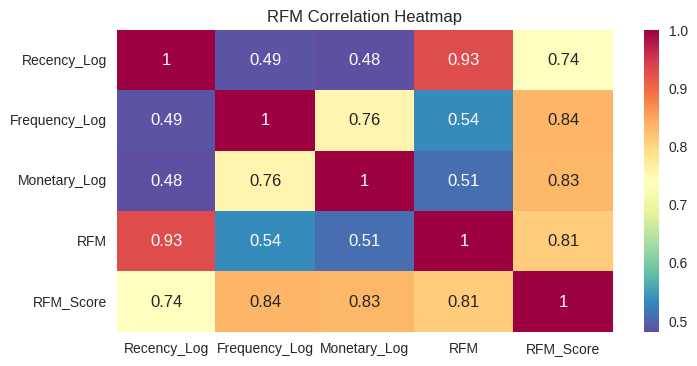

In [45]:
# Visualizing the correlations among features.
target = ['Recency_Log','Frequency_Log','Monetary_Log','RFM','RFM_Score']
plt.figure(figsize = (8, 4), dpi=100)
sns.heatmap(abs(rfm_df[target].corr()), annot=True, cmap='Spectral_r')
plt.title('RFM Correlation Heatmap')
plt.show()

# <b> K-Means Clustering </b>

# <b> Applying Silhouette Score Method on Recency and Monetary </b>

In [88]:
features_rec_mon = ['Recency_Log','Monetary_Log']
X_features_rec_mon = rfm_df[features_rec_mon].values
scaler_rec_mon = StandardScaler()
X_rec_mon = scaler_rec_mon.fit_transform(X_features_rec_mon)
X = X_rec_mon

In [89]:
def silhouette_plot(x):

  ''' This function print the Silhouette Score and visulalise the Silhouette plot 
       for various clusters.  ''' 
  range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]

  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, random_state=10)
      cluster_labels = clusterer.fit_predict(X)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(X, cluster_labels)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(X, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
      ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                  c="white", alpha=1, s=200, edgecolor='k')

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                      s=50, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")
      plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.4202119296501157
For n_clusters = 3 The average silhouette_score is : 0.34067145636149254
For n_clusters = 4 The average silhouette_score is : 0.3622714854600872
For n_clusters = 5 The average silhouette_score is : 0.3355001242181177
For n_clusters = 6 The average silhouette_score is : 0.3434891924808371
For n_clusters = 7 The average silhouette_score is : 0.341011944219176
For n_clusters = 8 The average silhouette_score is : 0.3370994995831896
For n_clusters = 9 The average silhouette_score is : 0.3437612312671633
For n_clusters = 10 The average silhouette_score is : 0.34679266018482796
For n_clusters = 11 The average silhouette_score is : 0.3369786349936747
For n_clusters = 12 The average silhouette_score is : 0.33910292328273095
For n_clusters = 13 The average silhouette_score is : 0.3382256875659721
For n_clusters = 14 The average silhouette_score is : 0.3395238240442325
For n_clusters = 15 The average silhouette_score is : 0.3

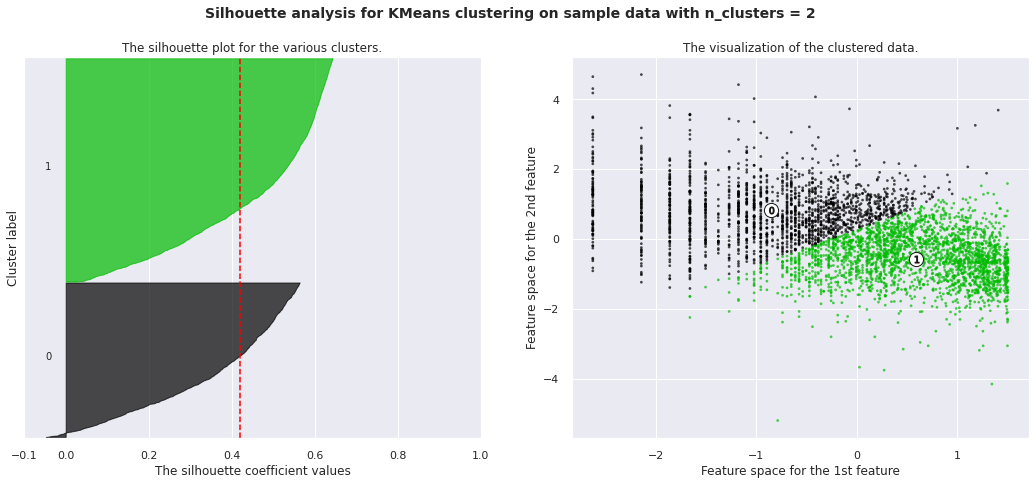

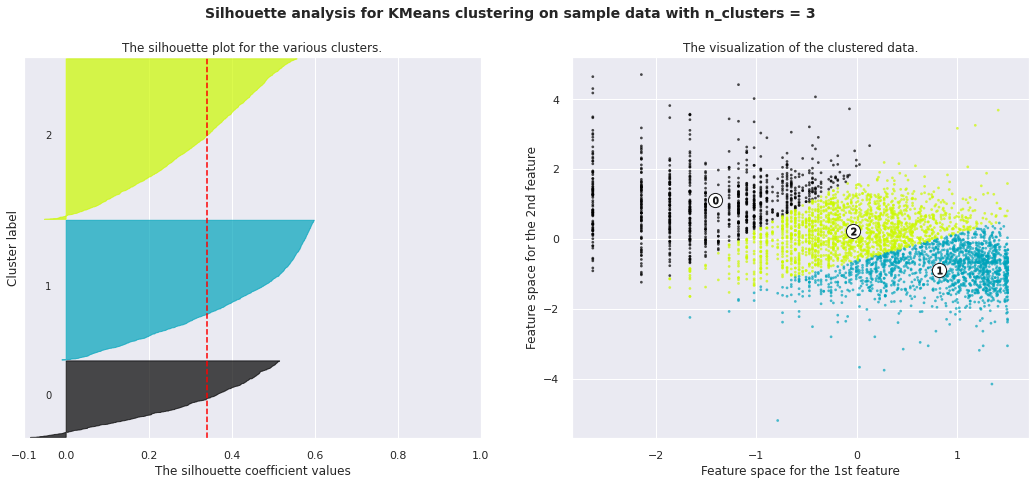

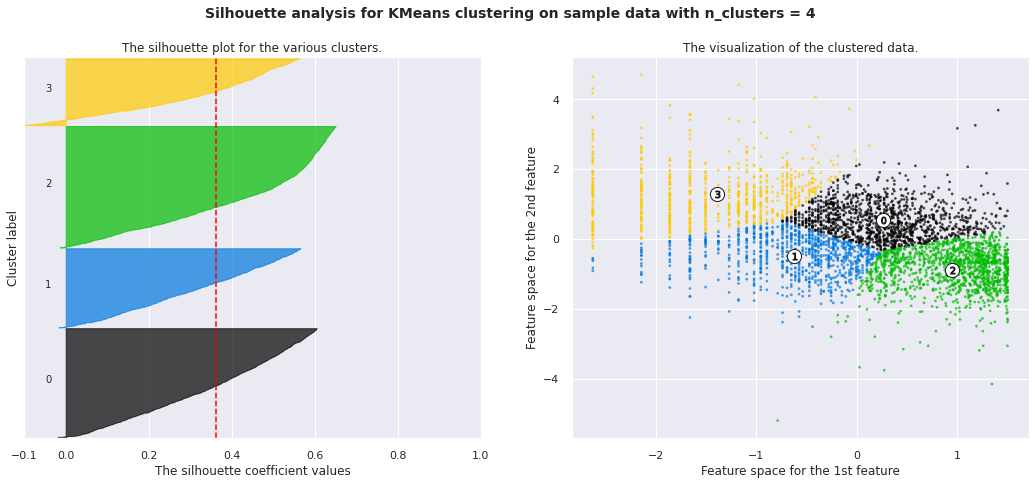

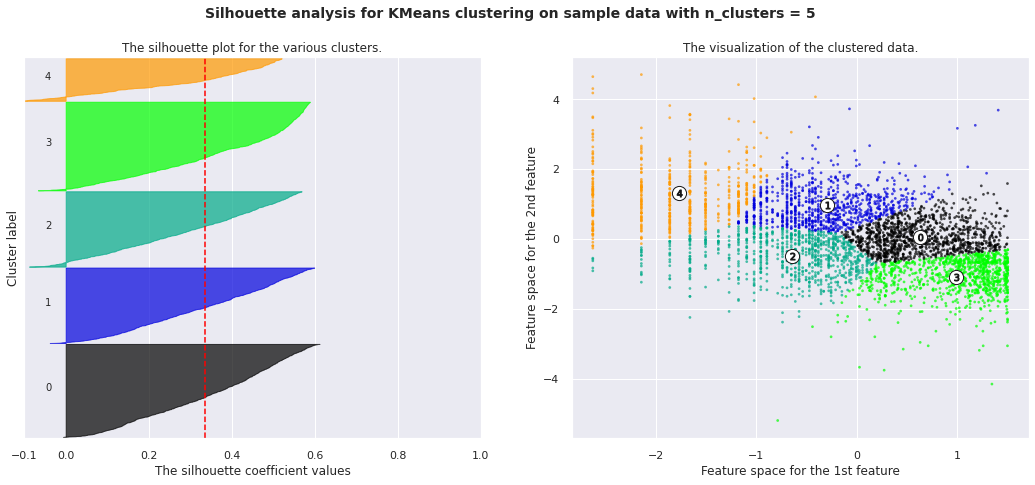

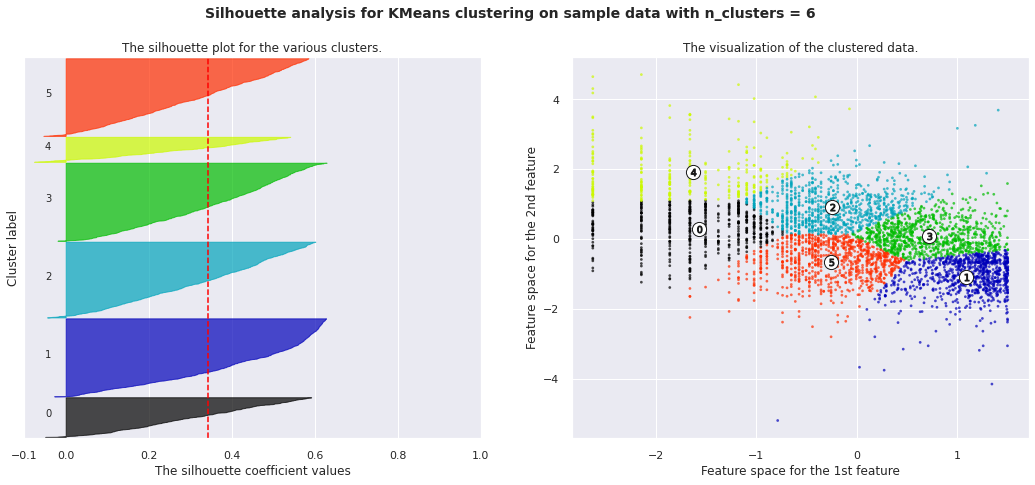

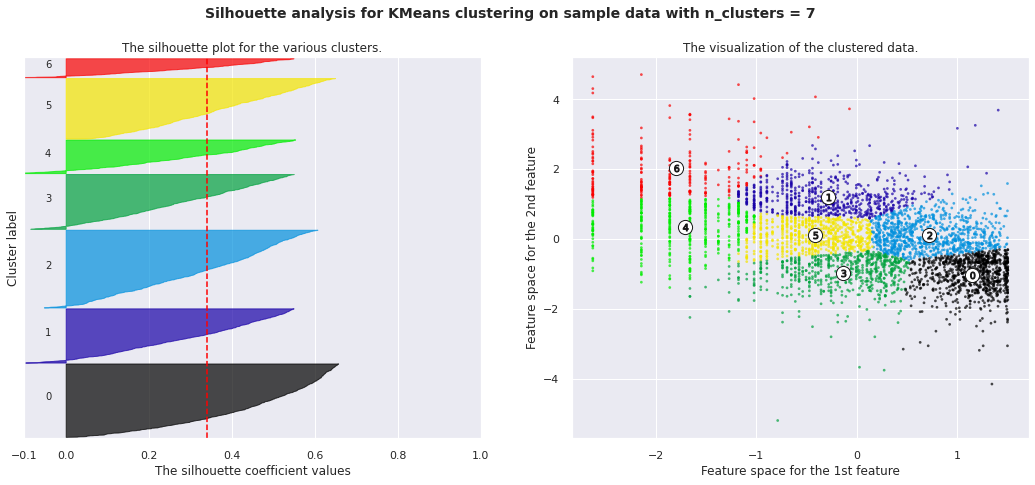

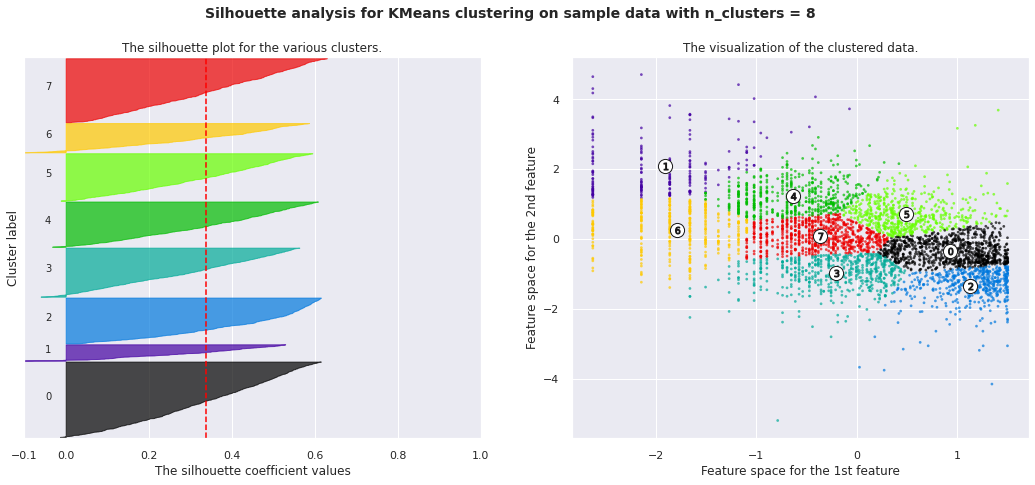

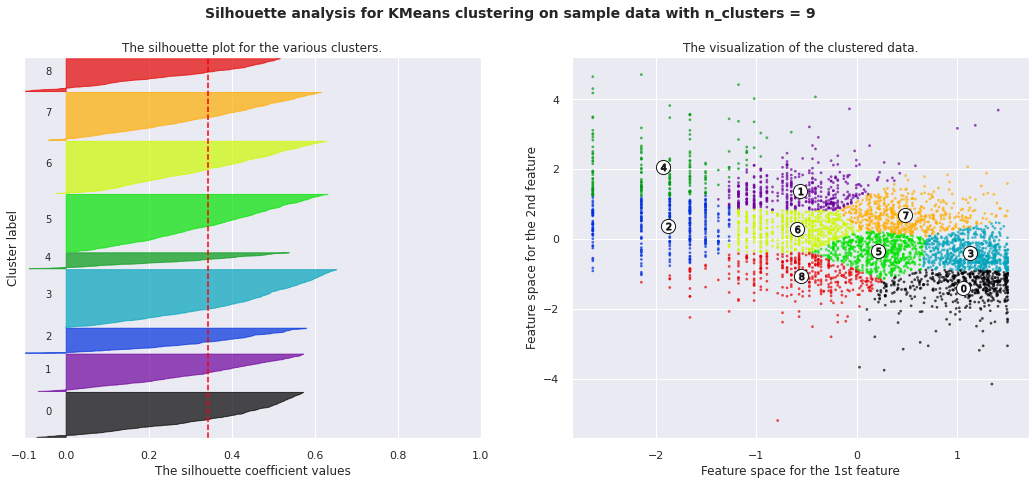

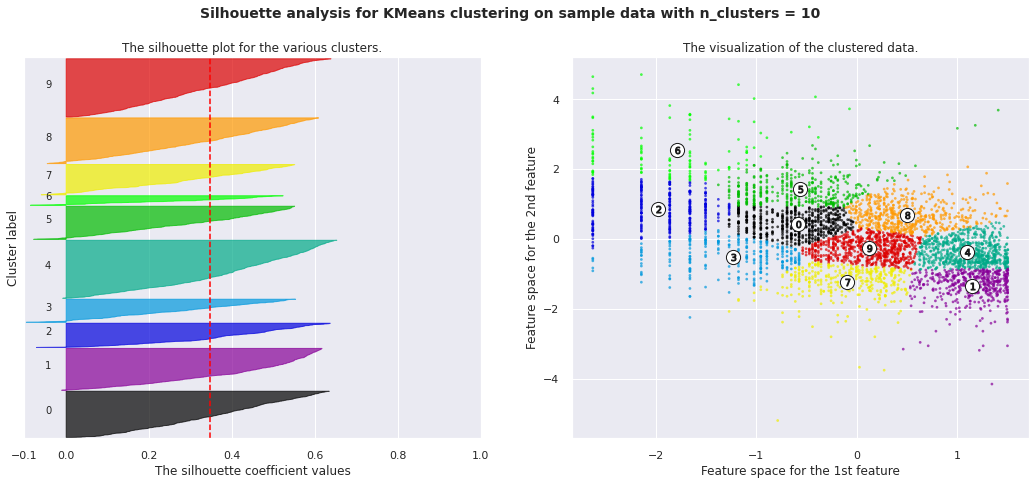

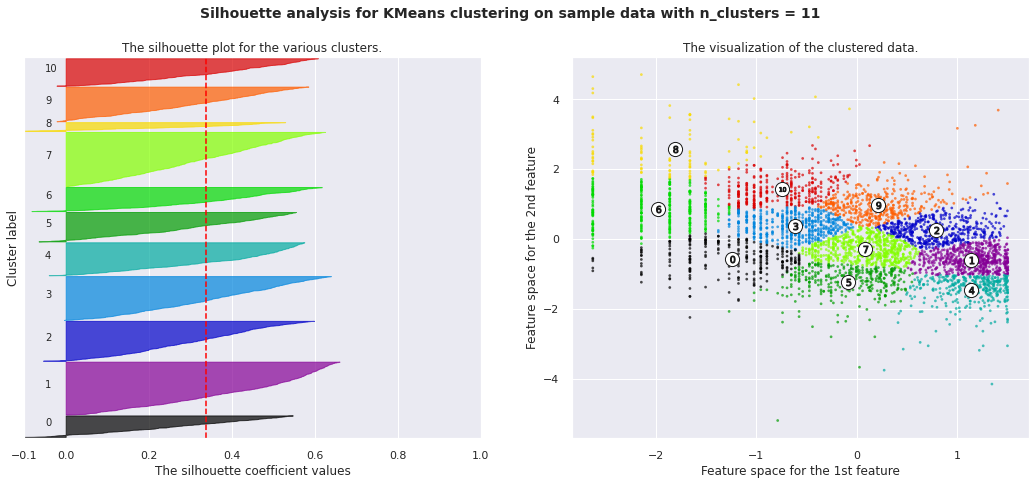

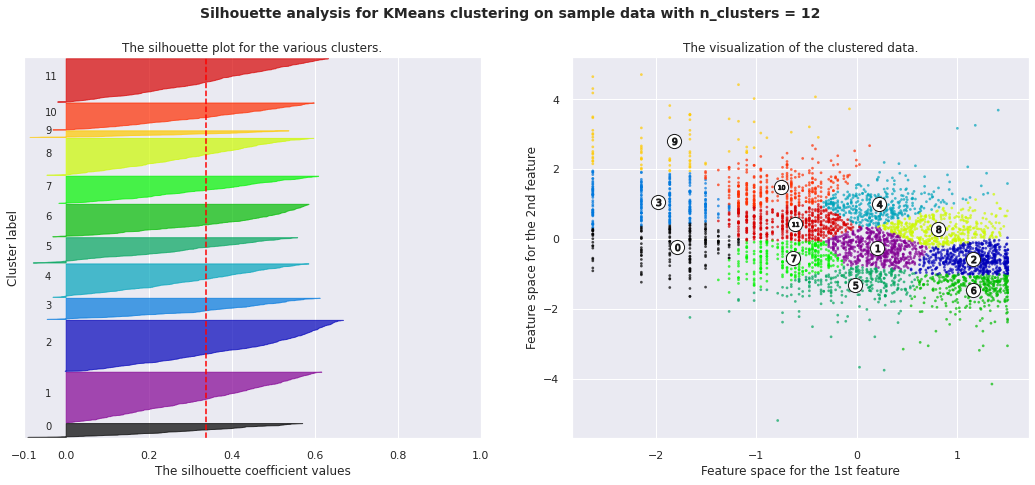

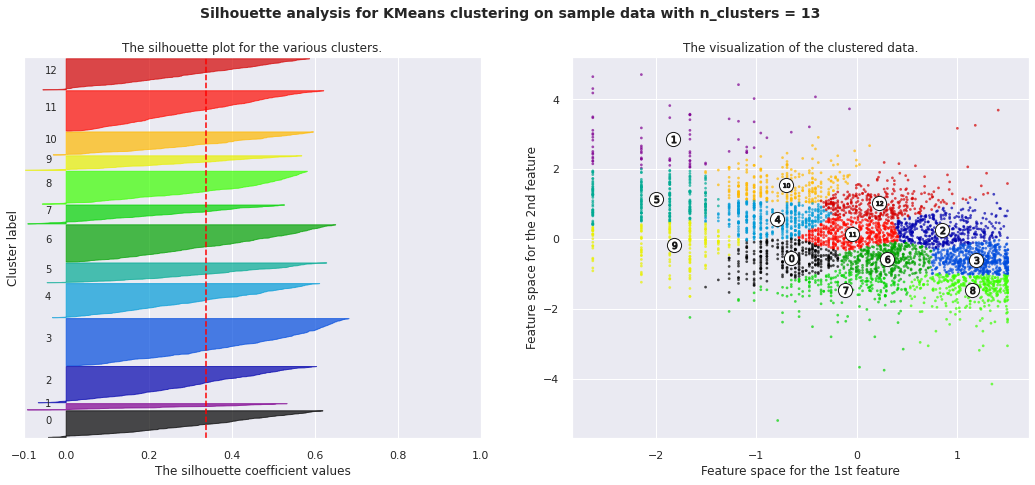

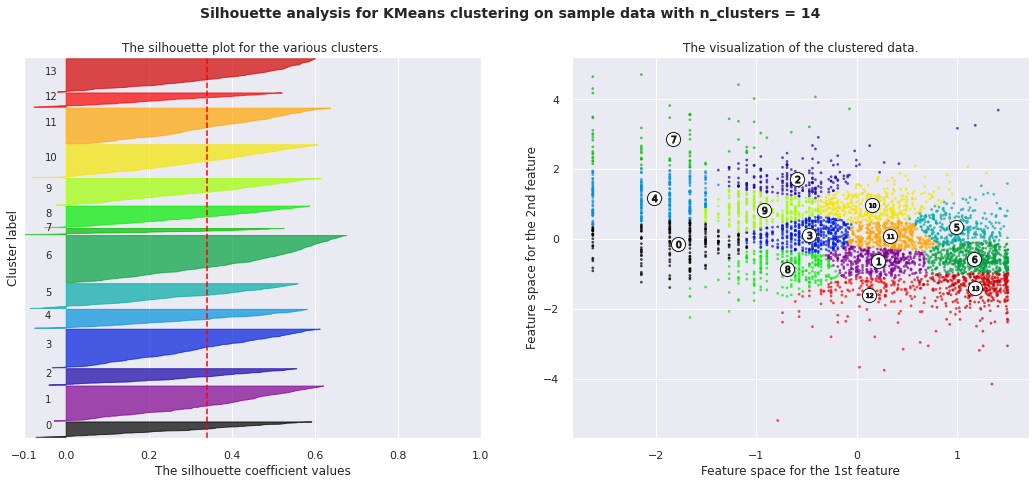

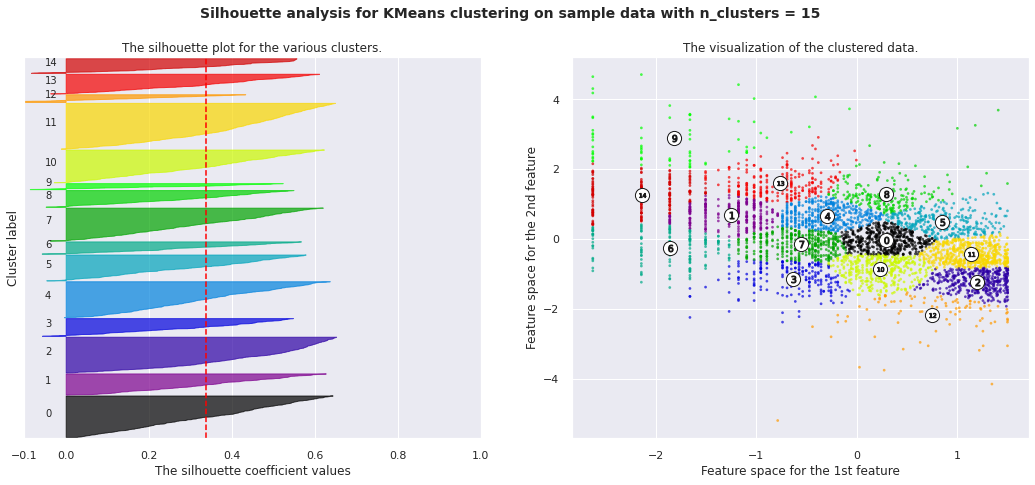

In [90]:
silhouette_plot(X)

<b> Here we can see that for n_cluster=2 silhouette score is good as compared to others. (If values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.) </b>

# <b> Applying Elbow Method on Recency and Monetary </b>

In [91]:
def elbow_method(x):
  ''' This function plot the Elbow curve. '''
  sum_of_sq_dist = {}
  for k in range(1,15):
      km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
      km = km.fit(X)
      sum_of_sq_dist[k] = km.inertia_
      
  #Plot the graph for the sum of square distance values and Number of Clusters
  plt.figure(figsize=(9,6))
  sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
  plt.xlabel('Number of Clusters(k)')
  plt.ylabel('Sum of Square Distances')
  plt.title('Elbow Method For Optimal k')
  plt.show()

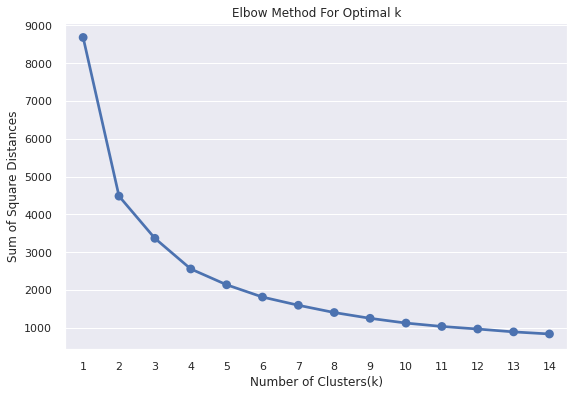

In [92]:
elbow_method(X)

### <b> Here we can see that Optimal value for cluster came out to be 2. </b>

In [93]:
# Applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans = kmeans_rec_mon.predict(X)

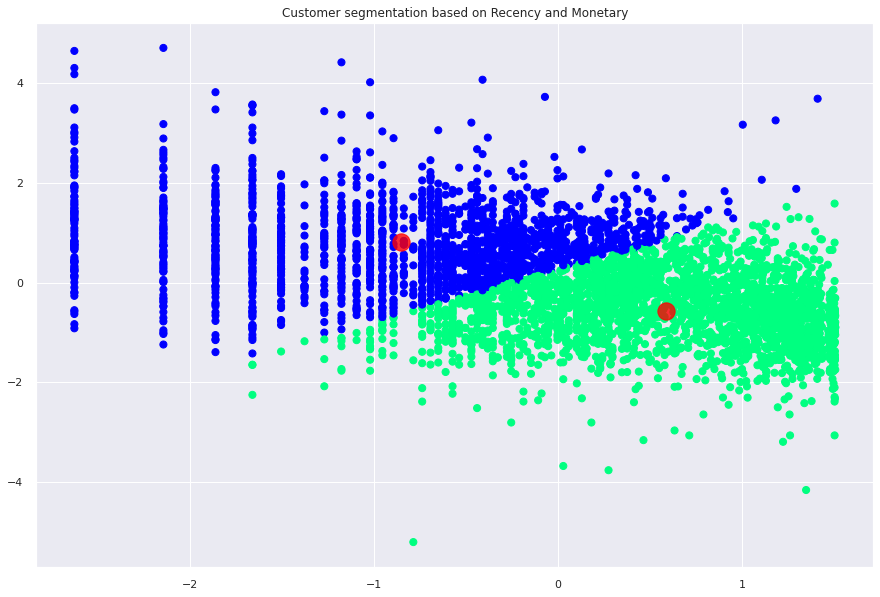

In [94]:
# Ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('Customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8);

###**We see that, Customers are well separate when we cluster them by Recency and Monetary.**

# <b> Applying DBSCAN  on Recency and Monetary </b>

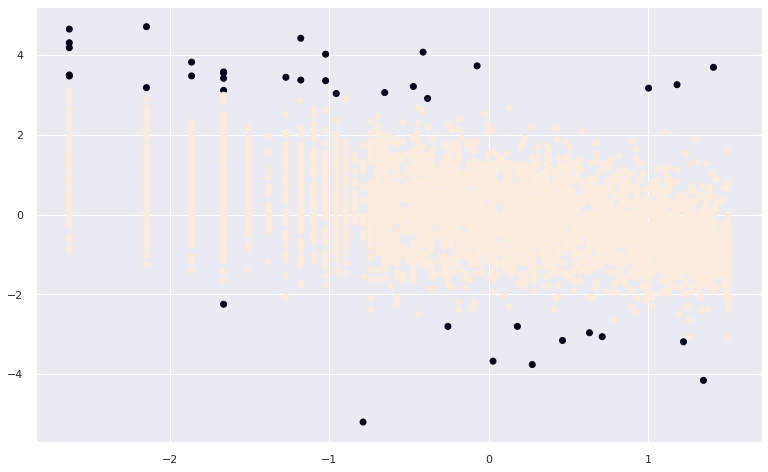

In [95]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

# <b> ----------------------------------------Frequency and Monetary-------------------------------</b>

#**Applying silhouette Score  Method on Frquency and Monetary**

In [96]:
features_fre_mon = ['Frequency_Log','Monetary_Log']
X_features_fre_mon = rfm_df[features_fre_mon].values
scaler_fre_mon = StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X = X_fre_mon

For n_clusters = 2 The average silhouette_score is : 0.4784099179679686
For n_clusters = 3 The average silhouette_score is : 0.40757749282612954
For n_clusters = 4 The average silhouette_score is : 0.37157165676272724
For n_clusters = 5 The average silhouette_score is : 0.3466695882675493
For n_clusters = 6 The average silhouette_score is : 0.3608098837522082
For n_clusters = 7 The average silhouette_score is : 0.34523225896250365
For n_clusters = 8 The average silhouette_score is : 0.3539370060466263
For n_clusters = 9 The average silhouette_score is : 0.34221986400439963
For n_clusters = 10 The average silhouette_score is : 0.3609945921059099
For n_clusters = 11 The average silhouette_score is : 0.36763269351025524
For n_clusters = 12 The average silhouette_score is : 0.35573940488791267
For n_clusters = 13 The average silhouette_score is : 0.3624706360428065
For n_clusters = 14 The average silhouette_score is : 0.3591056907661104
For n_clusters = 15 The average silhouette_score is :

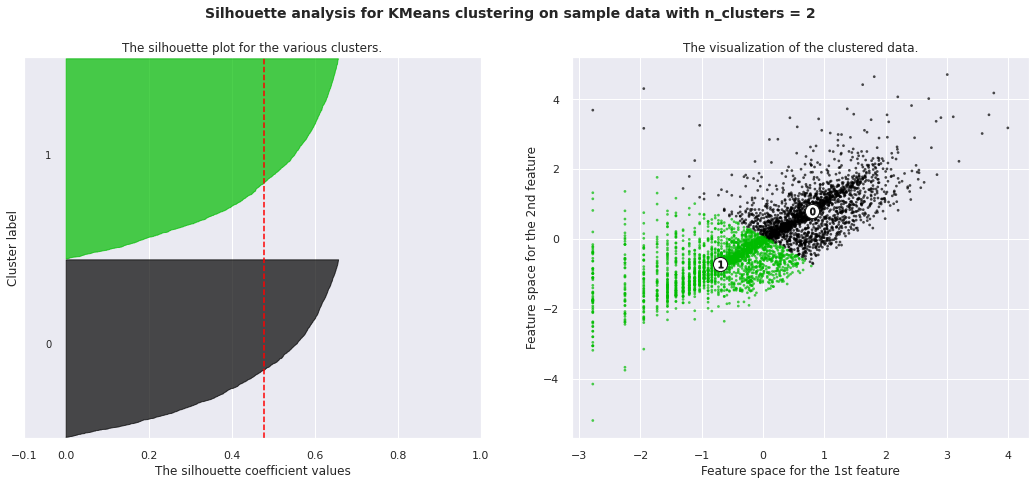

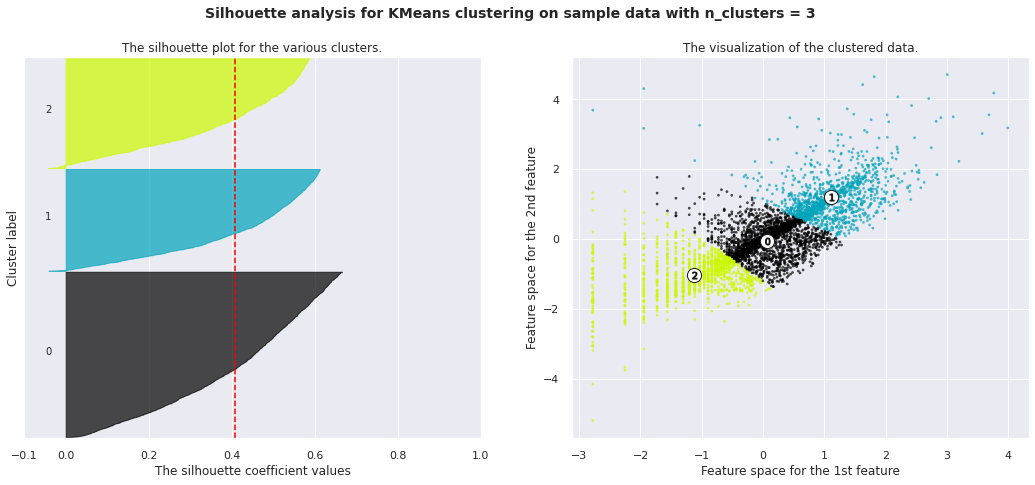

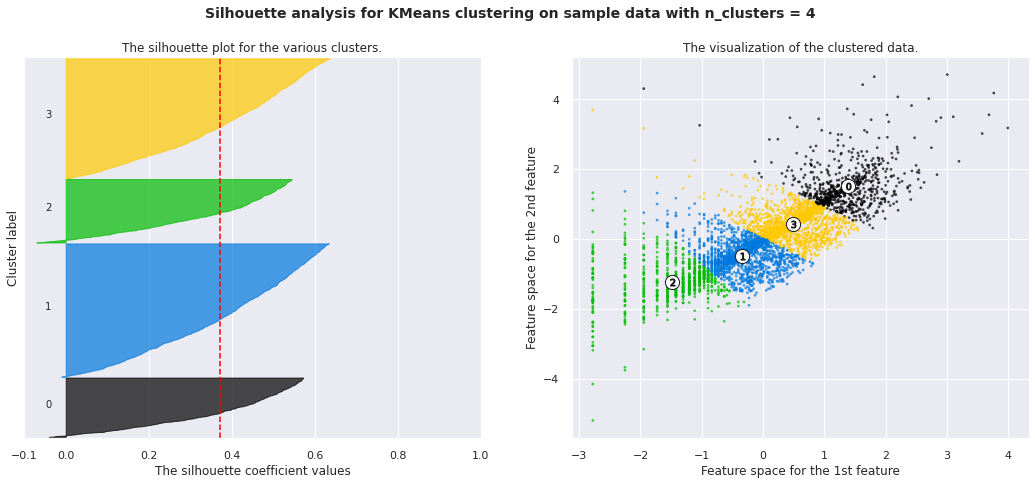

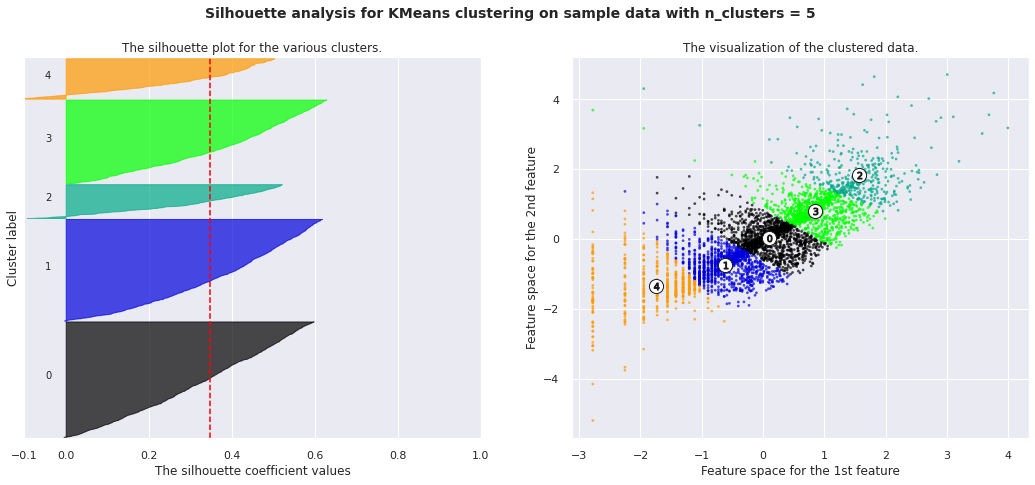

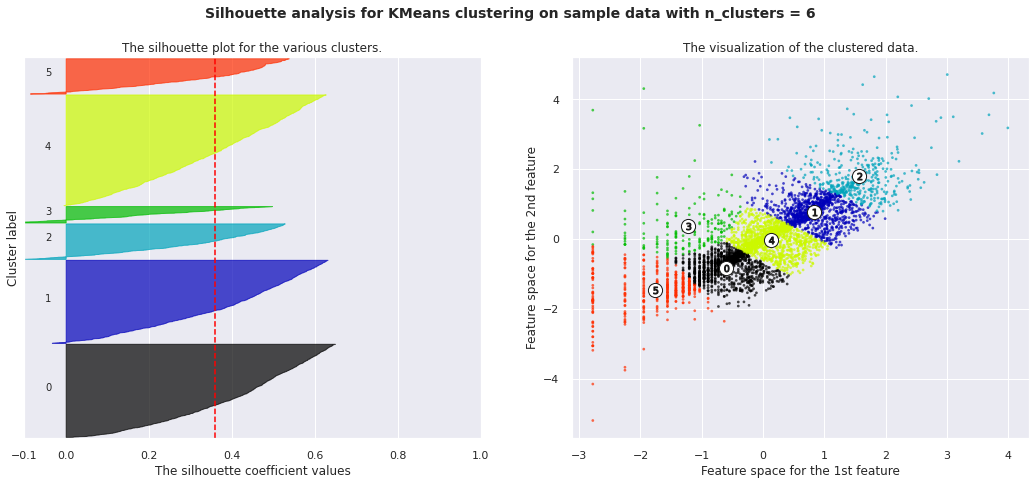

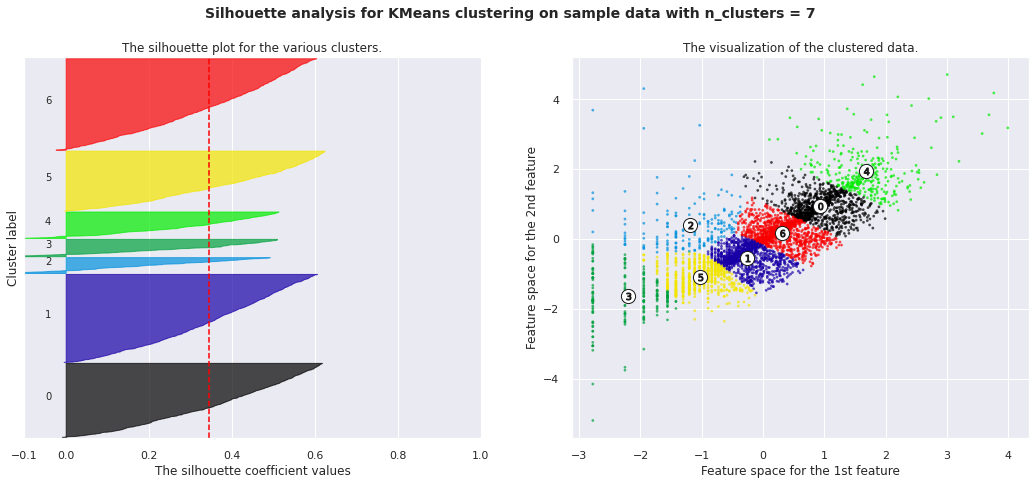

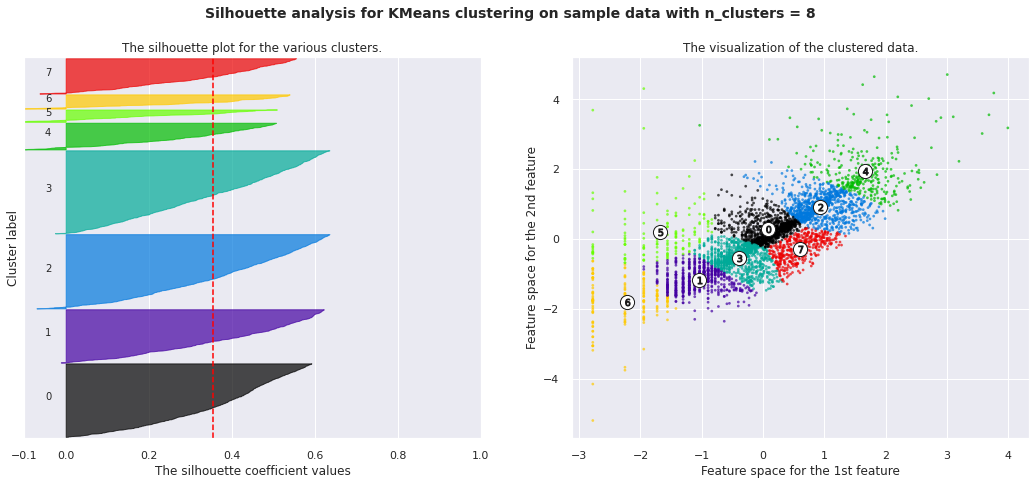

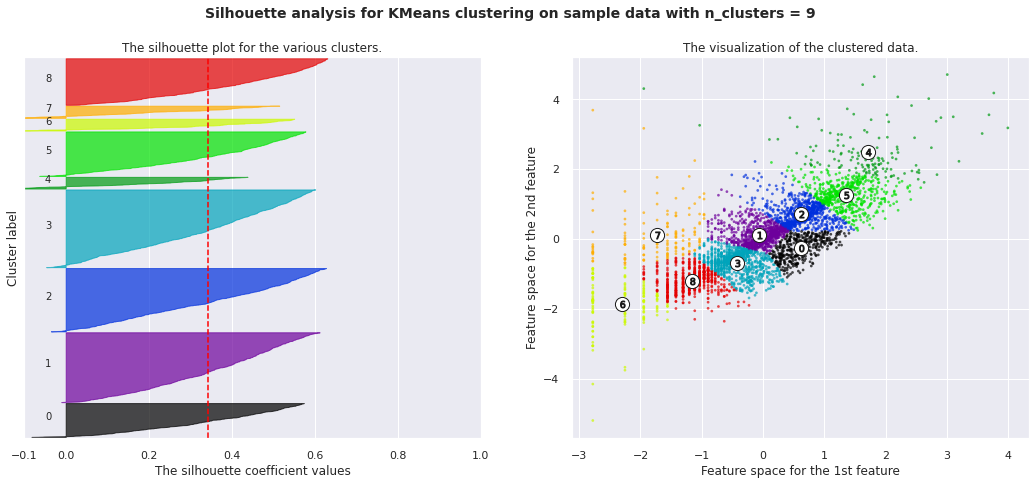

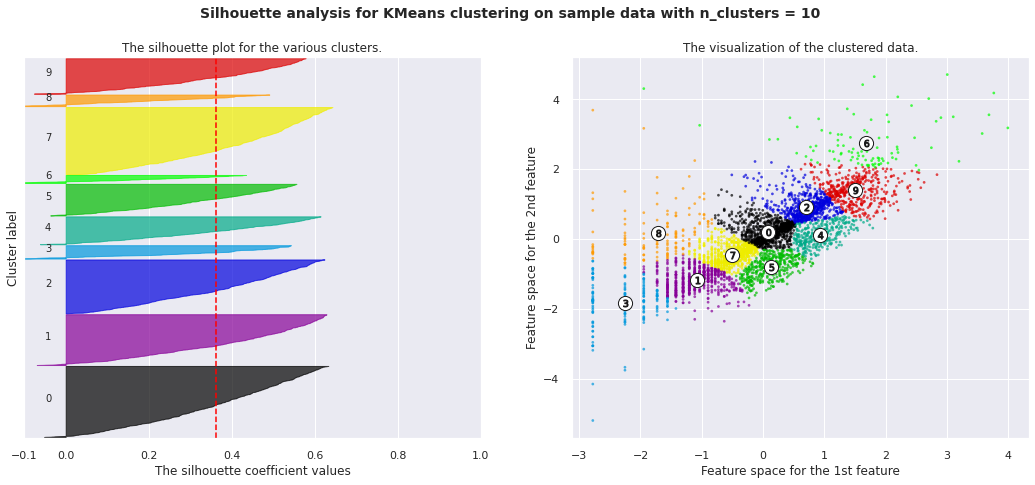

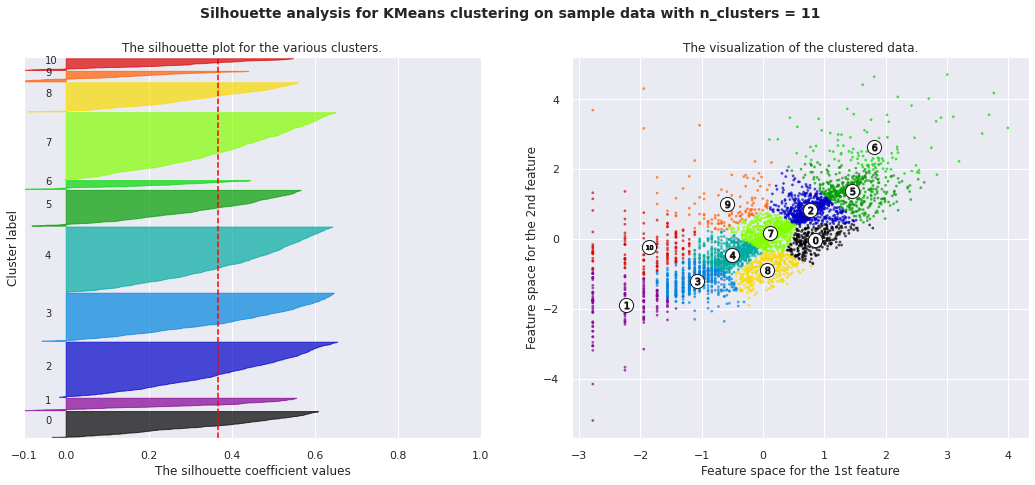

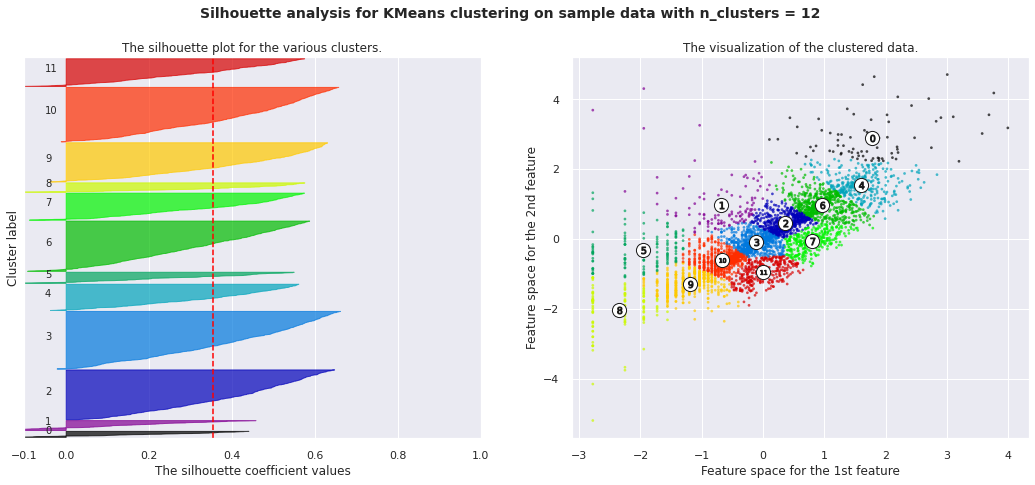

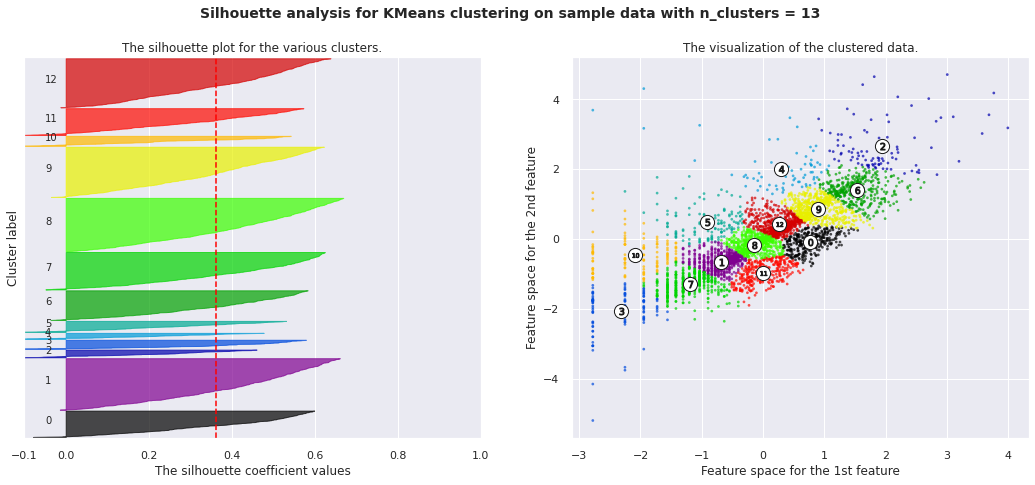

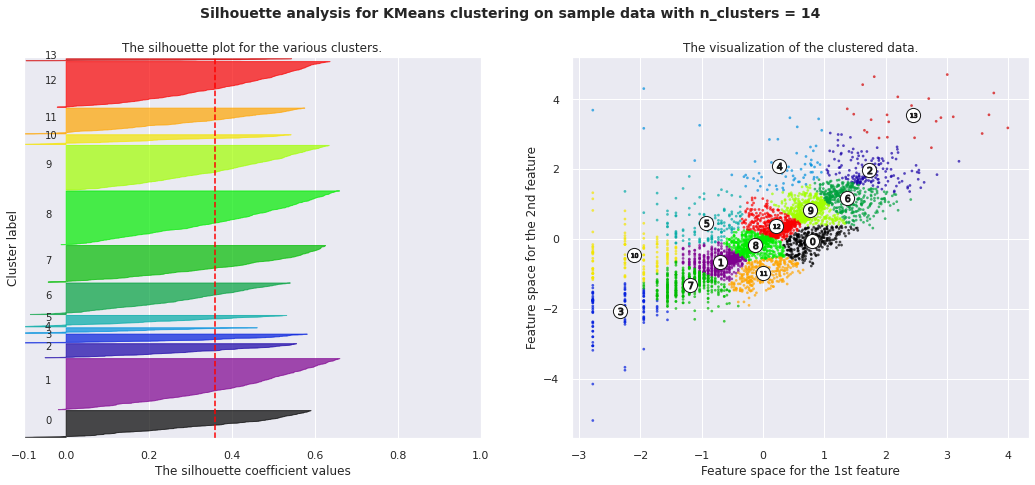

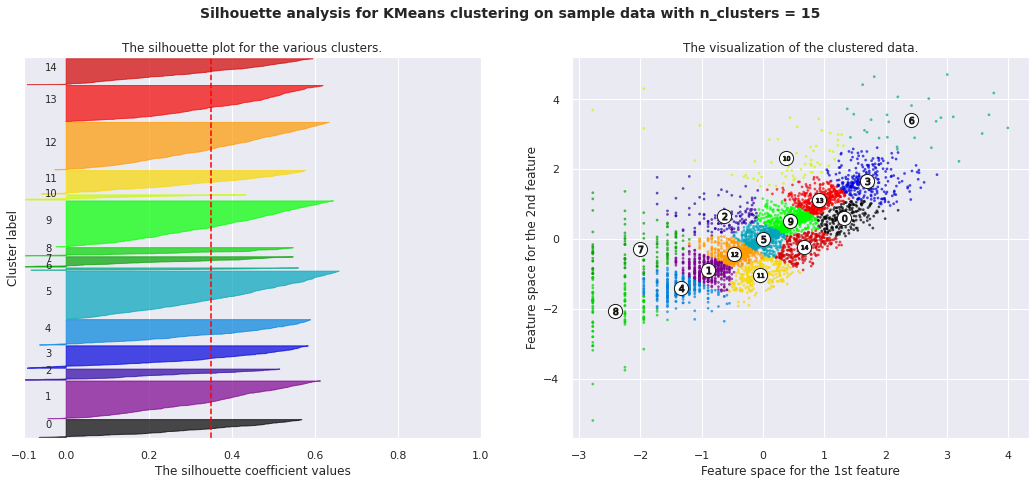

In [97]:
silhouette_plot(X)

#**Applying Elbow Method on Frequency and Monetary**


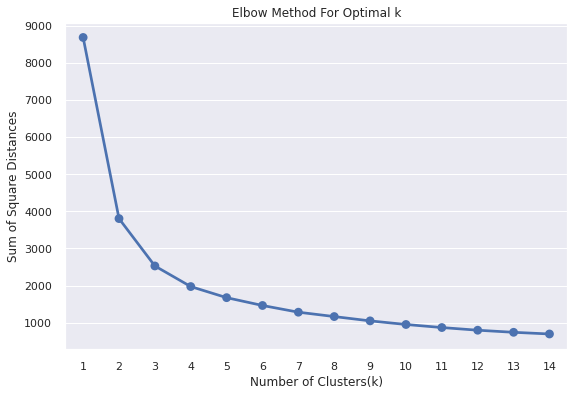

In [98]:
elbow_method(X)

## <b> So giving n_clusters=2 on Kmeans Model. </b> 

In [99]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

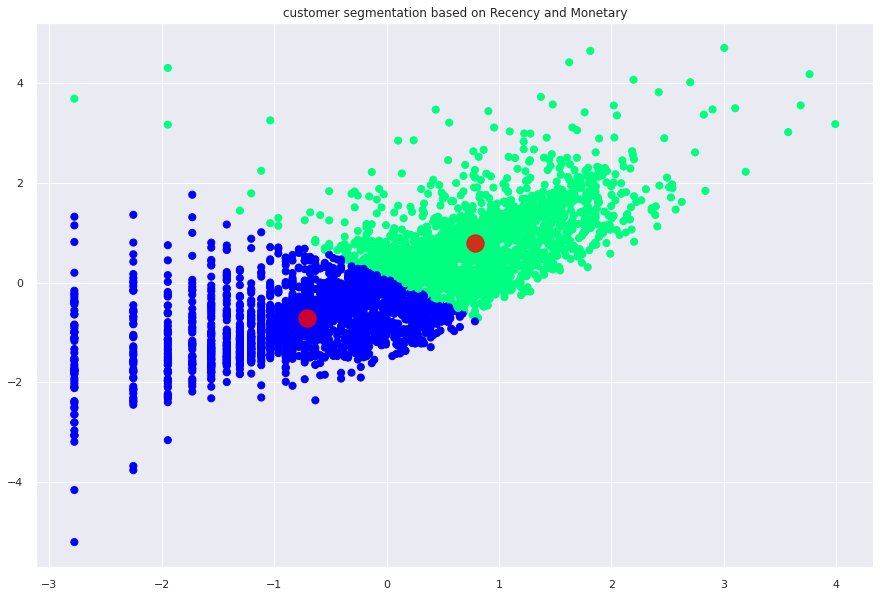

In [101]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8);

#**Applying DBSCAN to Method on Frquency and Monetary**

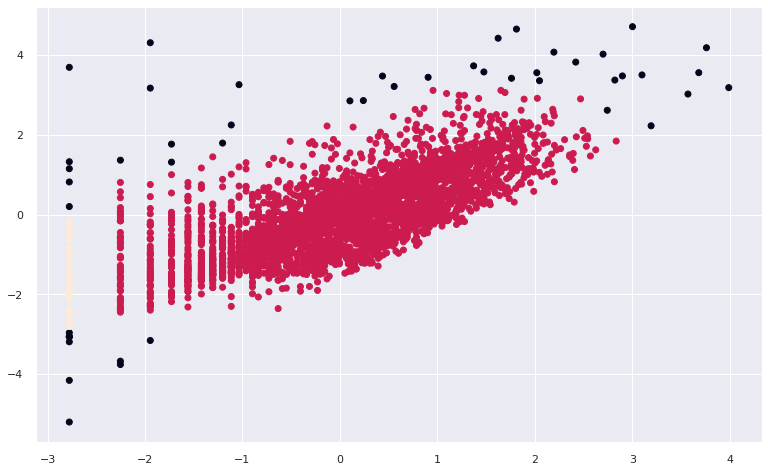

In [105]:
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.show()